<a href="https://colab.research.google.com/github/mavalliani/SFNet_survey/blob/master/SFNet_Survey_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [0]:
df = pd.read_csv("/content/csv file.csv", header=[0,1], encoding = "ISO-8859-1")
a = df.columns.get_level_values(0).to_series()
b = a.mask(a.str.startswith('Unnamed')).ffill().fillna('')
df.columns = [b, df.columns.get_level_values(1)]

In [3]:
df.iloc[:,0].fillna(-1, inplace=True)
df.iloc[:,0].value_counts()

 10.0    56
 8.0     34
 9.0     25
 7.0     11
 5.0      9
-1.0      8
 6.0      6
 0.0      2
 3.0      1
 1.0      1
 4.0      1
Name: (How likely is it that you would recommend Secured Finance Network to a friend or colleague?, Response), dtype: int64

In [0]:
temp = list(df.iloc[:,0])
category = []
for v in temp:
  if v in [10,9]:
    category.append("Promoter")
  elif v in [8, 7]:
    category.append("Passive")
  elif v in list(range(0,7)):
    category.append("Detractor")
  else:
    category.append("NR")


In [5]:
df[("Category", "by_NPS")] = category
df[("Category", "by_NPS")] = df[("Category", "by_NPS")].astype("category")
df.head()

How likely is it that you would recommend Secured Finance Network to a friend or colleague?  ...  Category
                                                                                     Response  ...    by_NPS
0                                                9.0                                           ...  Promoter
1                                               10.0                                           ...  Promoter
2                                               10.0                                           ...  Promoter
3                                                9.0                                           ...  Promoter
4                                               10.0                                           ...  Promoter

[5 rows x 54 columns]

In [0]:
df.iloc[:,1:8].fillna(-1, inplace=True)
df.iloc[:,1:8] = df.iloc[:,1:8].replace(np.nan, -1)
df.iloc[:,1:8] = df.iloc[:,1:8].astype('category')

In [7]:
df.iloc[:,3].value_counts()

4                 59
5ÿ (Excellent)    36
3ÿ (Neutral)      29
-1                22
2                  6
1ÿ (Poor)          2
Name: (How do you rate SFNet products and services related to the following?, Advocacy), dtype: int64

In [0]:
df.iloc[:,8].fillna("", inplace=True)

In [0]:
df.iloc[:,9:16].fillna(-1, inplace=True)
df.iloc[:,9:16] = df.iloc[:,9:16].replace(np.nan, -1)
df.iloc[:,9:16] = df.iloc[:,9:16].astype('category')

In [0]:
# df.iloc[:,16:36].fillna(0, inplace=True)
# df.iloc[:,16:36] = df.iloc[:,16:36].replace(np.nan, 0)
df.iloc[:,16:36] = np.where(pd.notnull(df.iloc[:,16:36]), 1, 0)
df.iloc[:,16:36] = df.iloc[:,16:36].astype('category')

In [0]:
df.iloc[:,36].fillna("", inplace=True)

In [0]:
df.iloc[:,37].fillna("NR", inplace=True)
df.iloc[:,37] = df.iloc[:,37].astype('category')

In [13]:
df.iloc[:,37].value_counts()

Occasionally    73
Often           54
Rarely          20
NR               7
Name: (How frequently do you interact with SFNet?, Response), dtype: int64

In [0]:
df.iloc[:,38:41].fillna("", inplace=True)
df.iloc[:,38:41] = df.iloc[:,38:41].replace(np.nan, '')

In [0]:
df.iloc[:,41:44] = df.iloc[:,41:44].replace(np.nan, 0)
df.iloc[:,41] = df.iloc[:,41].map(lambda x: 0 if x==0 else 1)
df.iloc[:,42] = df.iloc[:,42].map(lambda x: 0 if x==0 else 1)
df.iloc[:,43] = df.iloc[:,43].map(lambda x: 0 if x==0 else 1)
df.loc[df.iloc[:,43]==1, list(df.iloc[:,41:43].columns)] = 0,0

In [0]:
df.iloc[:,44].fillna("<NR>", inplace=True)
df.iloc[:,44] = df.iloc[:,44].astype('category')
df.iloc[:,45] = df.iloc[:,45].replace(np.nan, "")

In [17]:
df.iloc[:,44].value_counts()

Independent ABL                               31
Service provider or other (please specify)    30
Large bank-affiliated ABL                     29
Small to mid-sized bank-affiliated ABL        23
Independent factoring firm                    19
Law firm                                      13
<NR>                                           7
Bank-affiliated factoring firm                 2
Name: (What type of organization do you work for?, Response), dtype: int64

In [0]:
df.iloc[:,46].fillna("<NR>", inplace=True)
df.iloc[:,46] = df.iloc[:,46].astype('category')
df.iloc[:,47] = df.iloc[:,47].replace(np.nan, "")

In [19]:
df.iloc[:,46].value_counts()

Executive                               60
Business development/sales/marketing    38
Credit/underwriting                     17
Legal                                   12
Portfolio/relationship manager          10
<NR>                                     8
Other (please specify)                   4
Field examiner/appraiser                 4
Compliance                               1
Name: (What is your role in your organization?, Response), dtype: int64

In [0]:
from sklearn import preprocessing
le1 = preprocessing.LabelEncoder()
le1.fit(list(df.iloc[:,48]))
df.iloc[:,48] = le1.transform(list(df.iloc[:,48]))

In [21]:
df.iloc[:,48].value_counts()

1    94
2    42
0    11
3     7
Name: (How many years have you been in the secured finance industry?, Response), dtype: int64

In [22]:
le1.inverse_transform([1,2,3,0])

array(['20+', '6 to 19', 'nan', '1 to 5'], dtype='<U7')

In [0]:
le = preprocessing.LabelEncoder()
le.fit(list(df.iloc[:,49]))
df.iloc[:,49] = le.transform(list(df.iloc[:,49]))

In [24]:
le.inverse_transform([0,1,2,3])

array(['Female', 'Male', 'Prefer not to specify', 'nan'], dtype='<U21')

In [0]:
df.iloc[:,50].fillna("", inplace=True)

In [26]:
df.iloc[:,51:53] = df.iloc[:,51:53].replace(np.nan, 0)
df.iloc[:,51] = df.iloc[:,51].map(lambda x: 0 if x==0 else 1)
df.iloc[:,52] = df.iloc[:,52].map(lambda x: 0 if x==0 else 1)
df.iloc[:,51:53] = df.iloc[:,51:53].astype('category')
df.head()

How likely is it that you would recommend Secured Finance Network to a friend or colleague?  ...  Category
                                                                                     Response  ...    by_NPS
0                                                9.0                                           ...  Promoter
1                                               10.0                                           ...  Promoter
2                                               10.0                                           ...  Promoter
3                                                9.0                                           ...  Promoter
4                                               10.0                                           ...  Promoter

[5 rows x 54 columns]

# ***Analysis***

## Question 1: NPS score

In [27]:
# How many people voted for each category (-1 category stands for Not Responded)
df.iloc[:,0].value_counts()

 10.0    56
 8.0     34
 9.0     25
 7.0     11
 5.0      9
-1.0      8
 6.0      6
 0.0      2
 3.0      1
 1.0      1
 4.0      1
Name: (How likely is it that you would recommend Secured Finance Network to a friend or colleague?, Response), dtype: int64

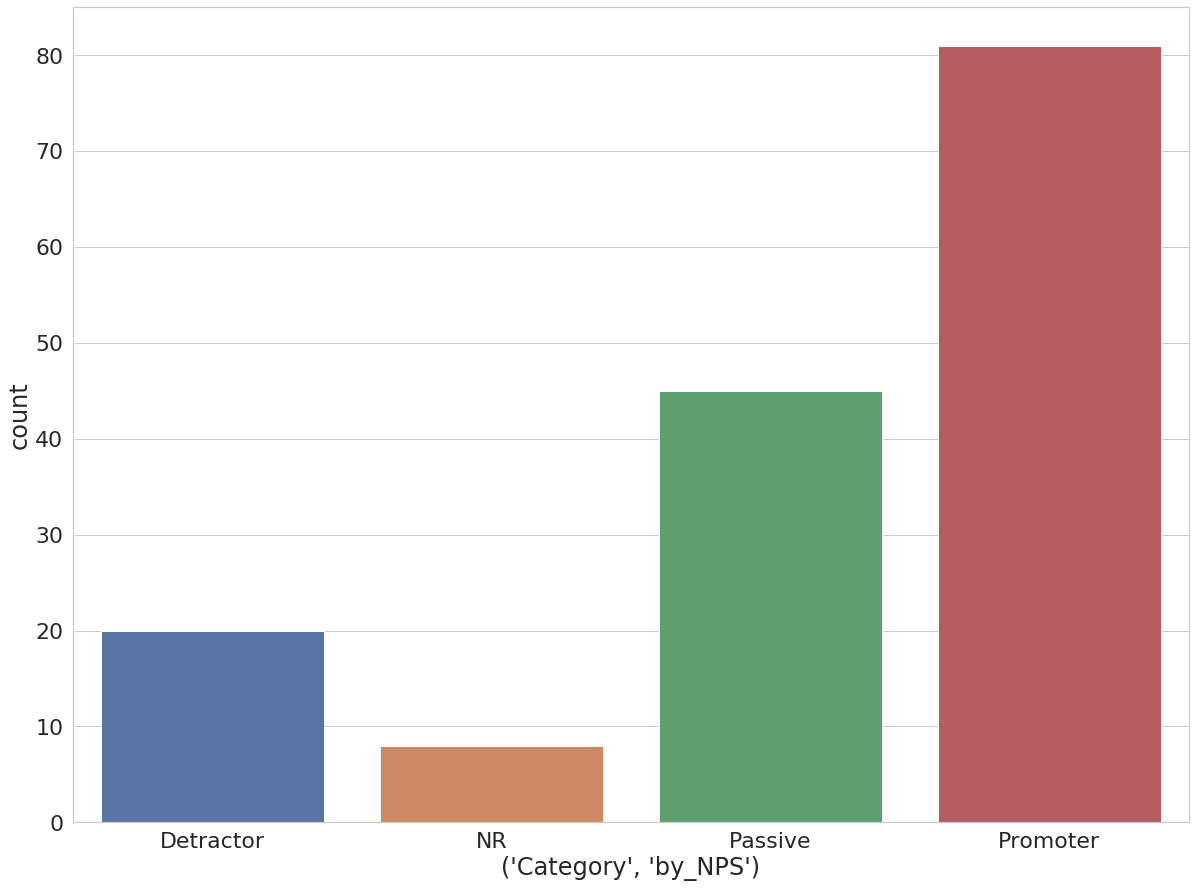

In [28]:
# grouping into Promoters, Passives and Detractors
sns.set(rc={'figure.figsize':(20,15)}, font_scale=2, style="whitegrid")
sns.countplot(df.iloc[:,-1])

We can see the highest category reported is Promoters, then the rest follows. 

## Question 2:  Rate SFNet products and services 

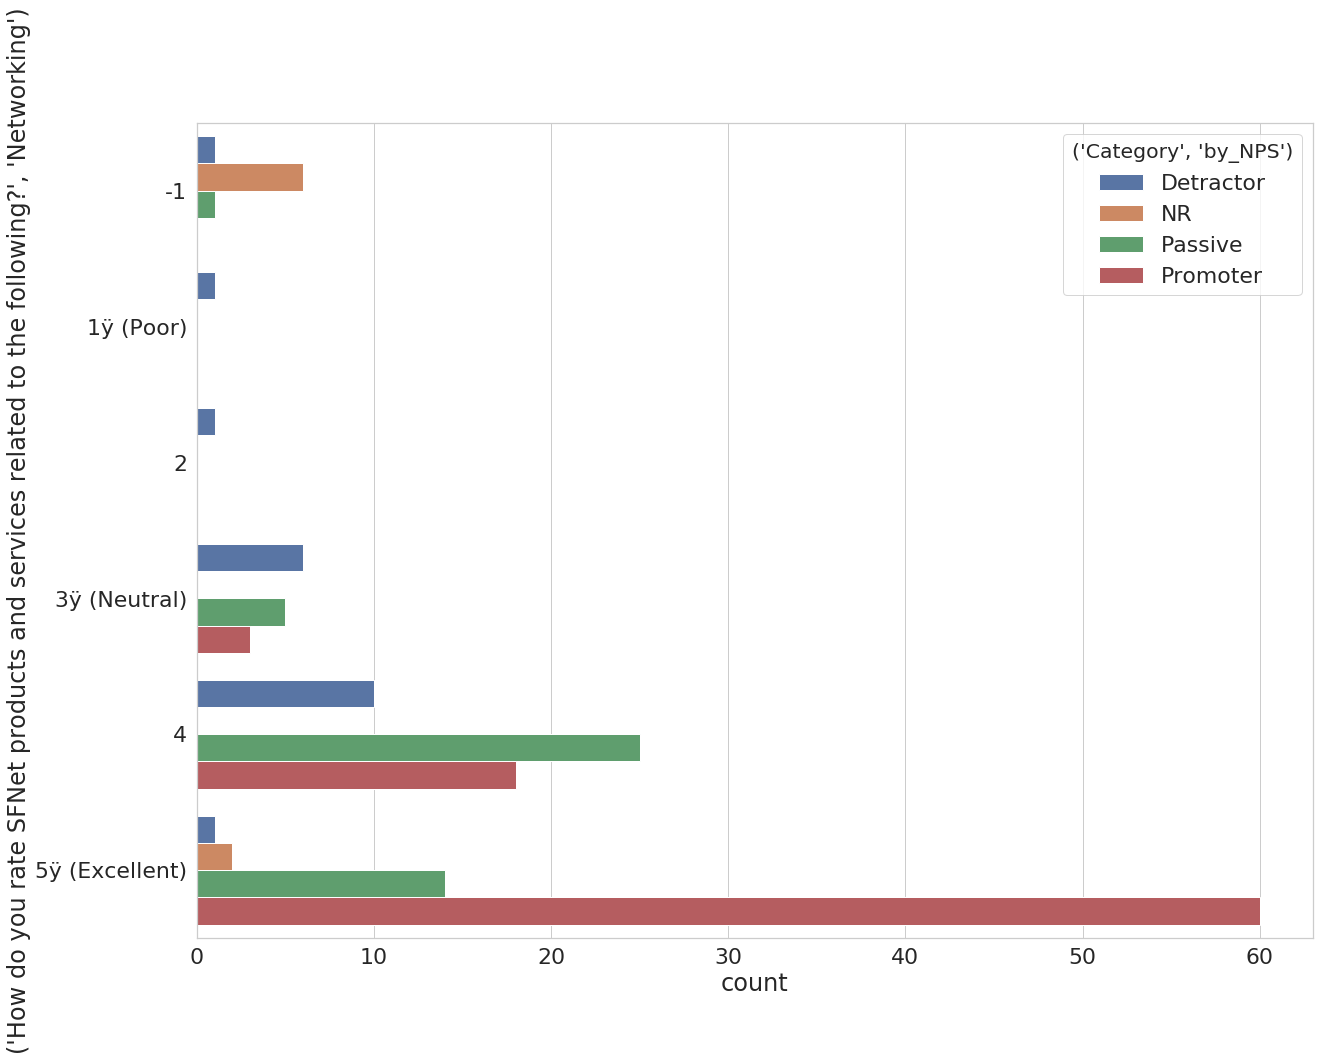

In [29]:
# fig, axs = plt.subplots(nrows= 4)

sns.countplot(y=df.iloc[:,1].name, hue=('Category', 'by_NPS'), data=df)

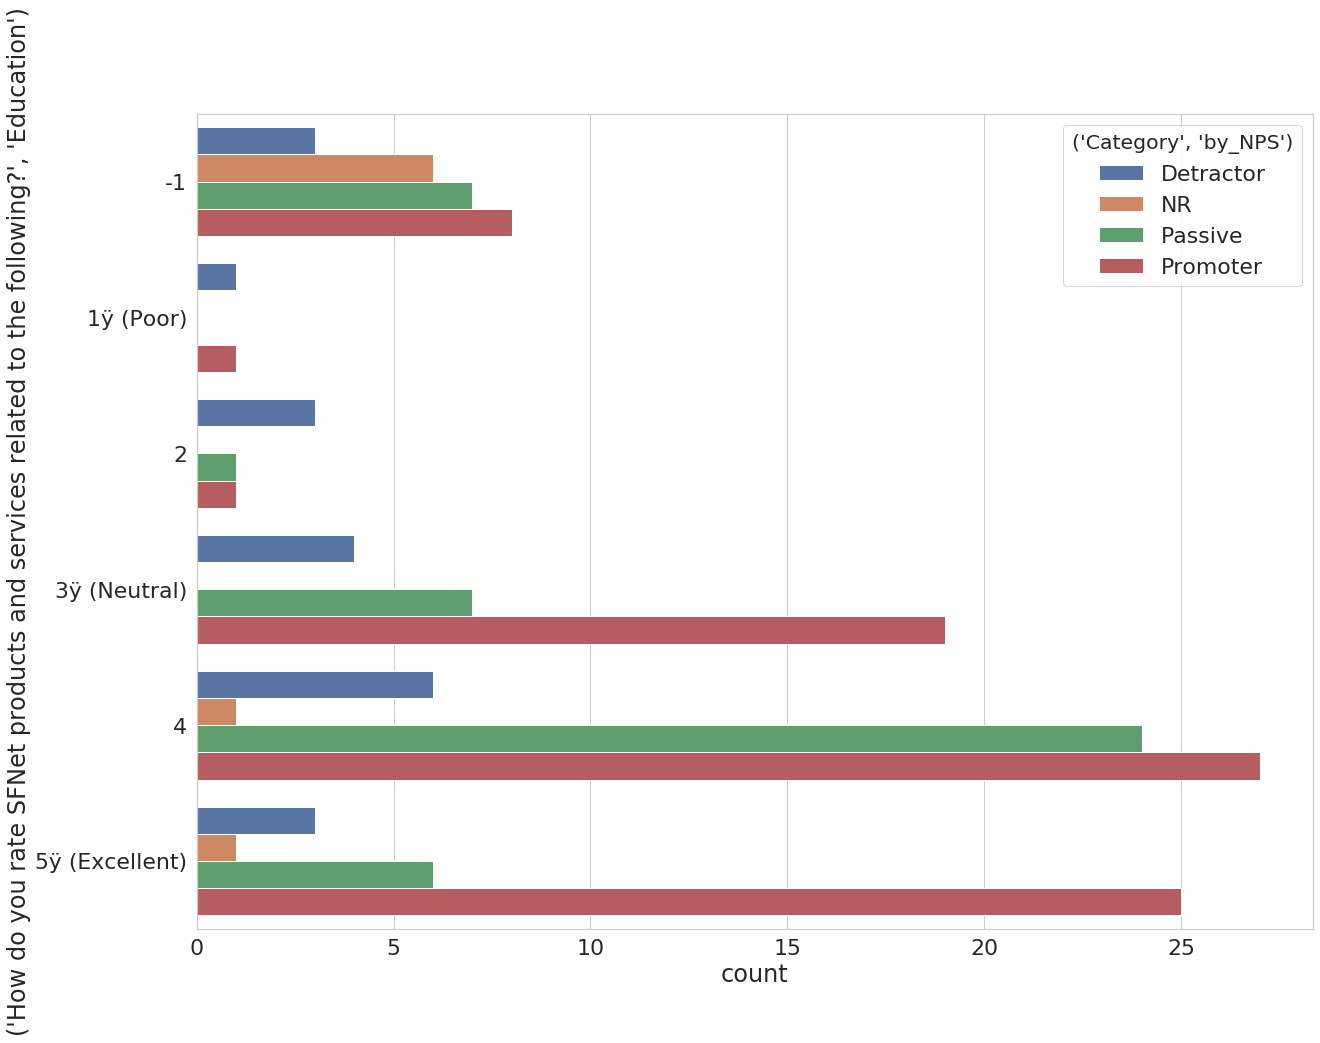

In [30]:
sns.countplot(y=df.iloc[:,2].name, hue=('Category', 'by_NPS'), data=df)

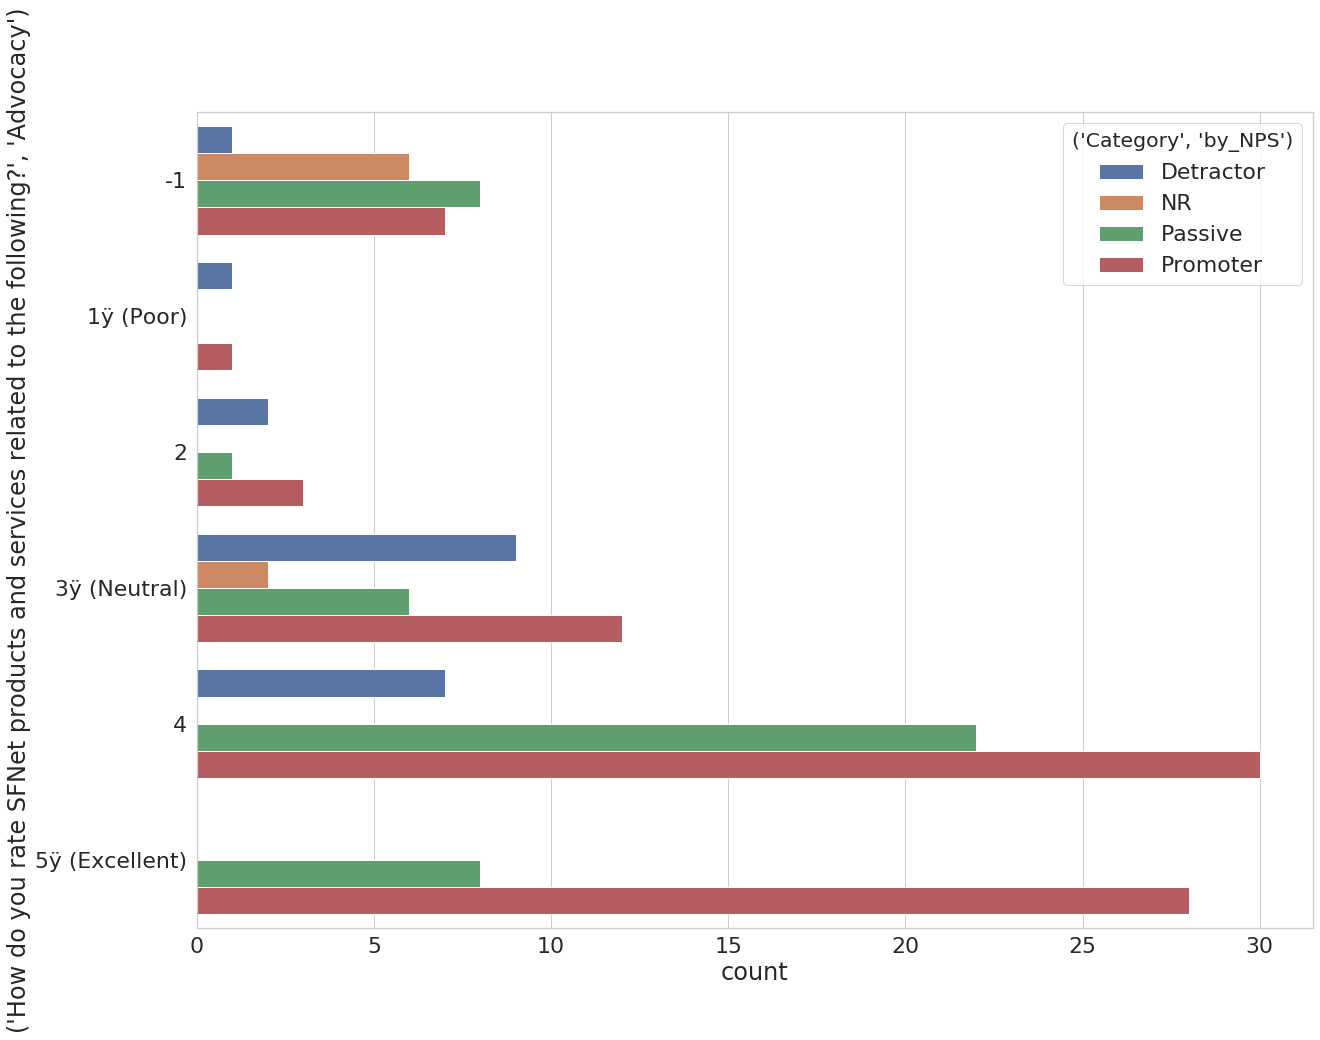

In [31]:
sns.countplot(y=df.iloc[:,3].name, hue=('Category', 'by_NPS'), data=df)

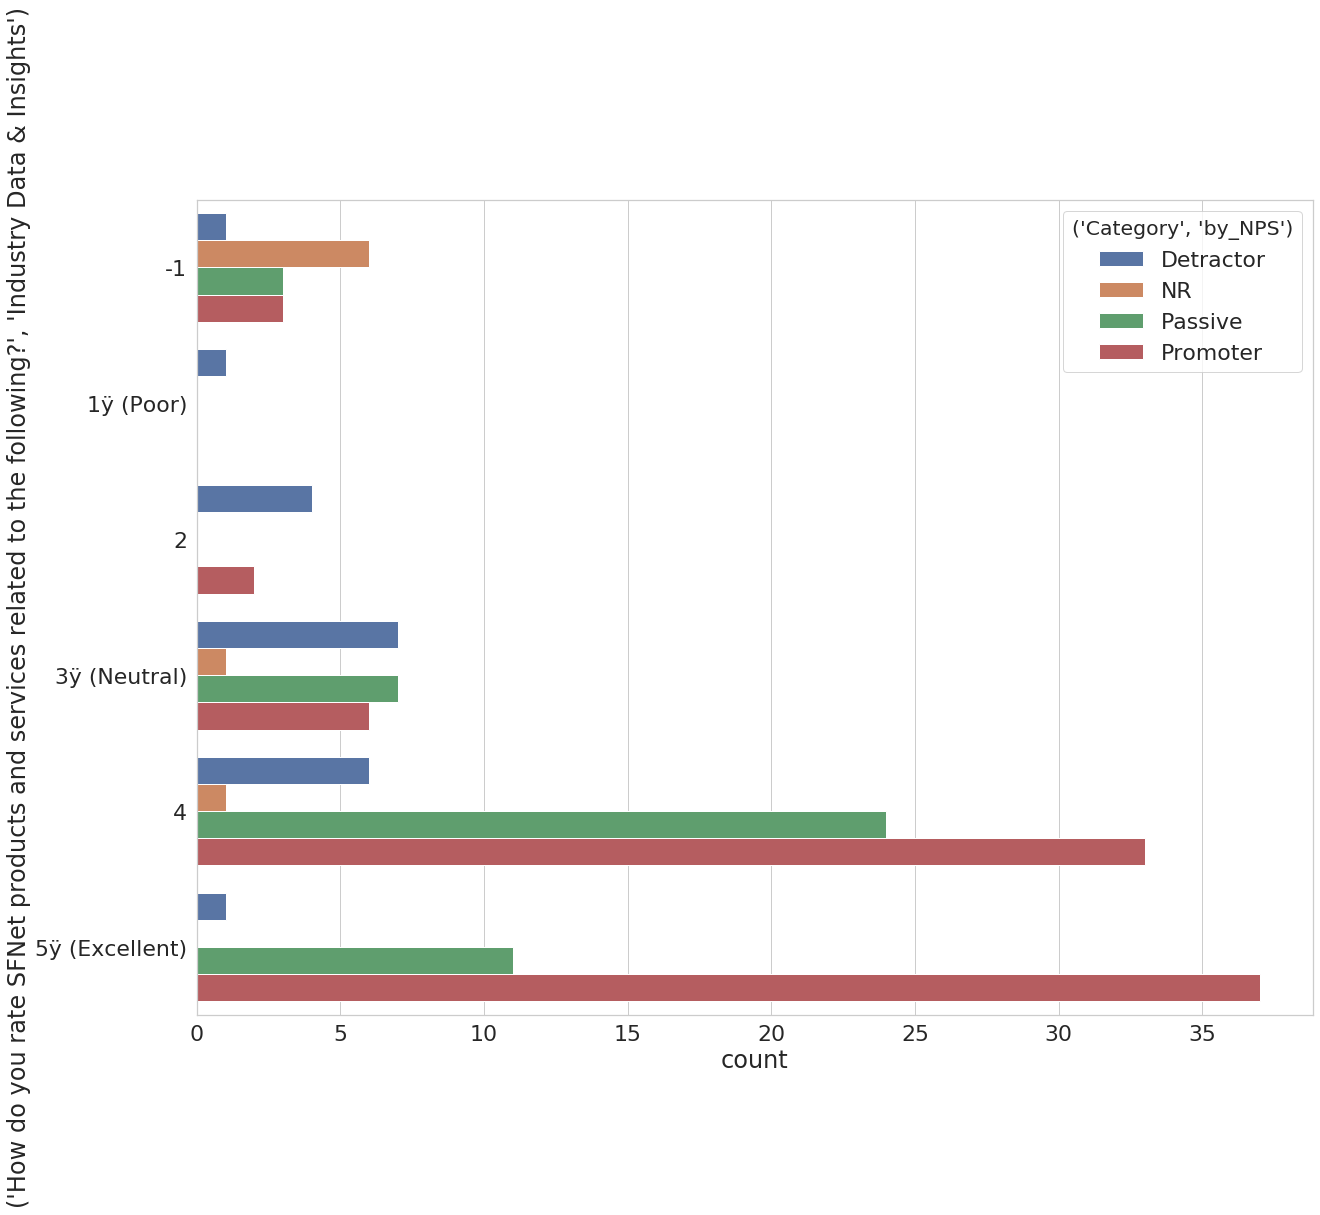

In [32]:
sns.countplot(y=df.iloc[:,4].name, hue=('Category', 'by_NPS'), data=df)

CLear Winner:
'Networking' is a clear attribute which the Promoters rate higher and the passives/detractors does not appreciate.

Runners up:
Advocacy and Industry Insights are also rated highly by Promoters but are also closely appreciated by Passives. Therefore these attributes may not by the distinguishing feature between the classes.

'Education' is not a distinguding feature here and is crowded at Rating 4, so it can be improved.

## Question 3: How do you rate Secured Finance Foundation’s initiatives related to the following?

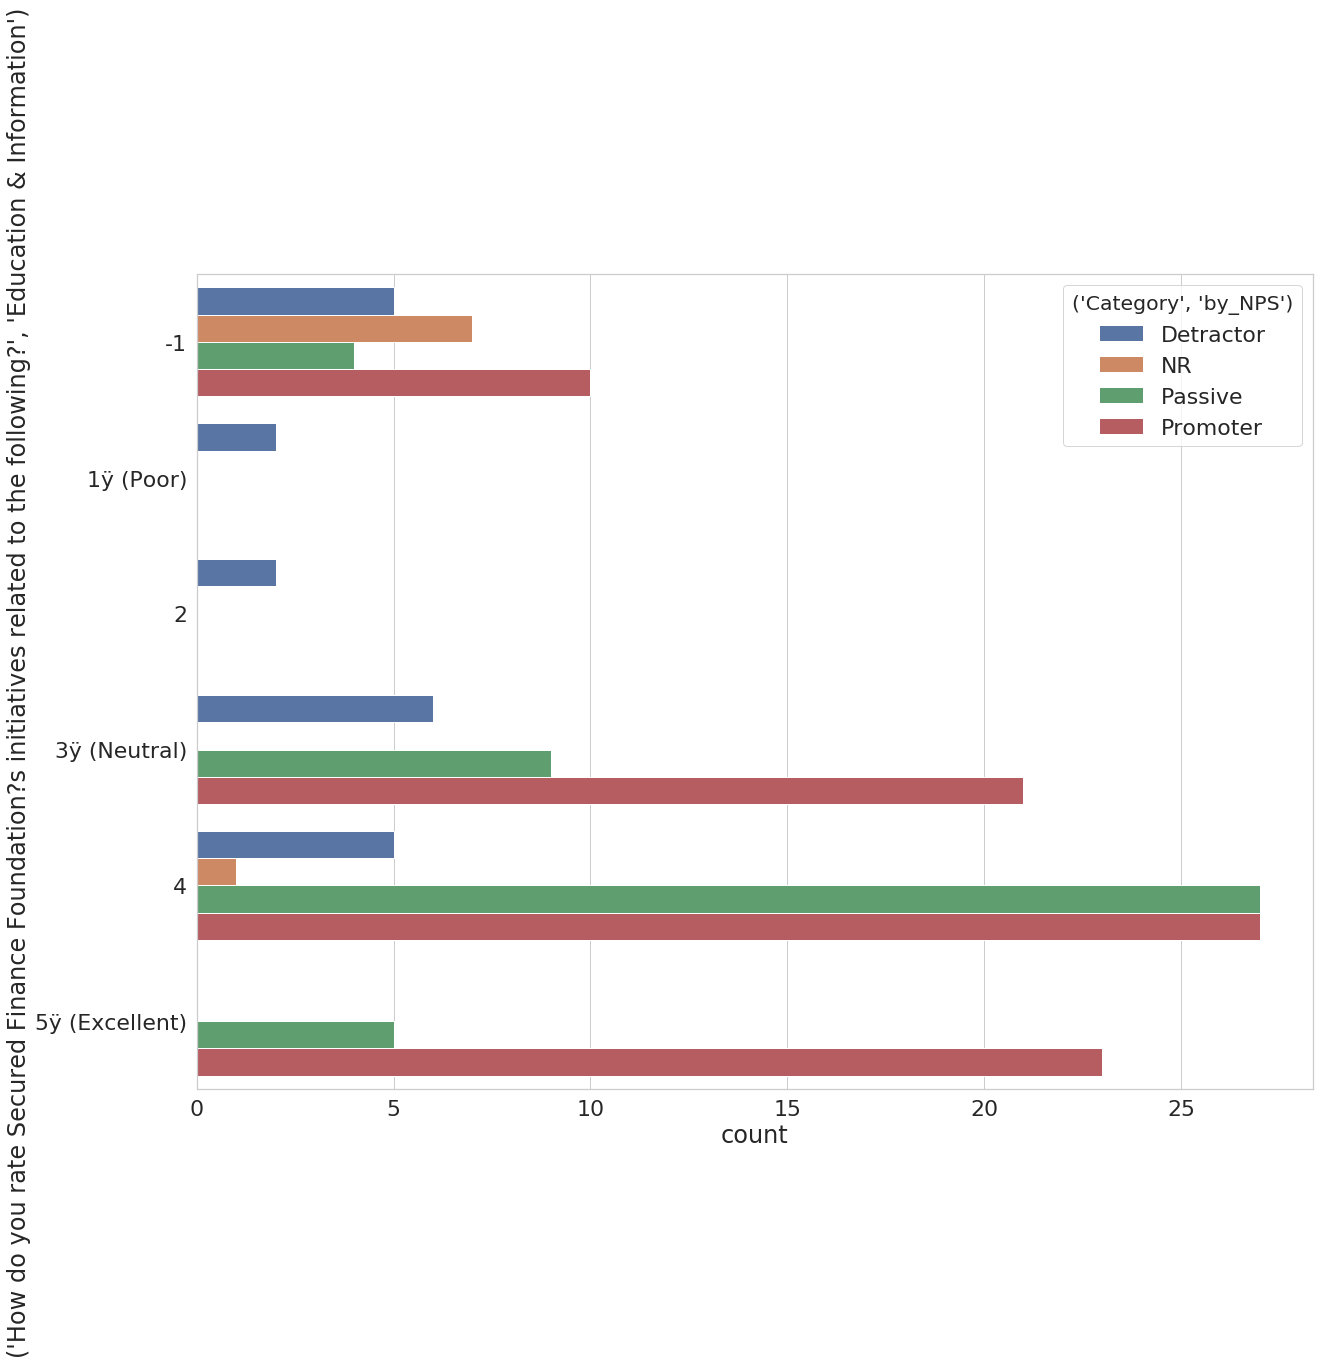

In [33]:
sns.countplot(y=df.iloc[:,5].name, hue=('Category', 'by_NPS'), data=df)

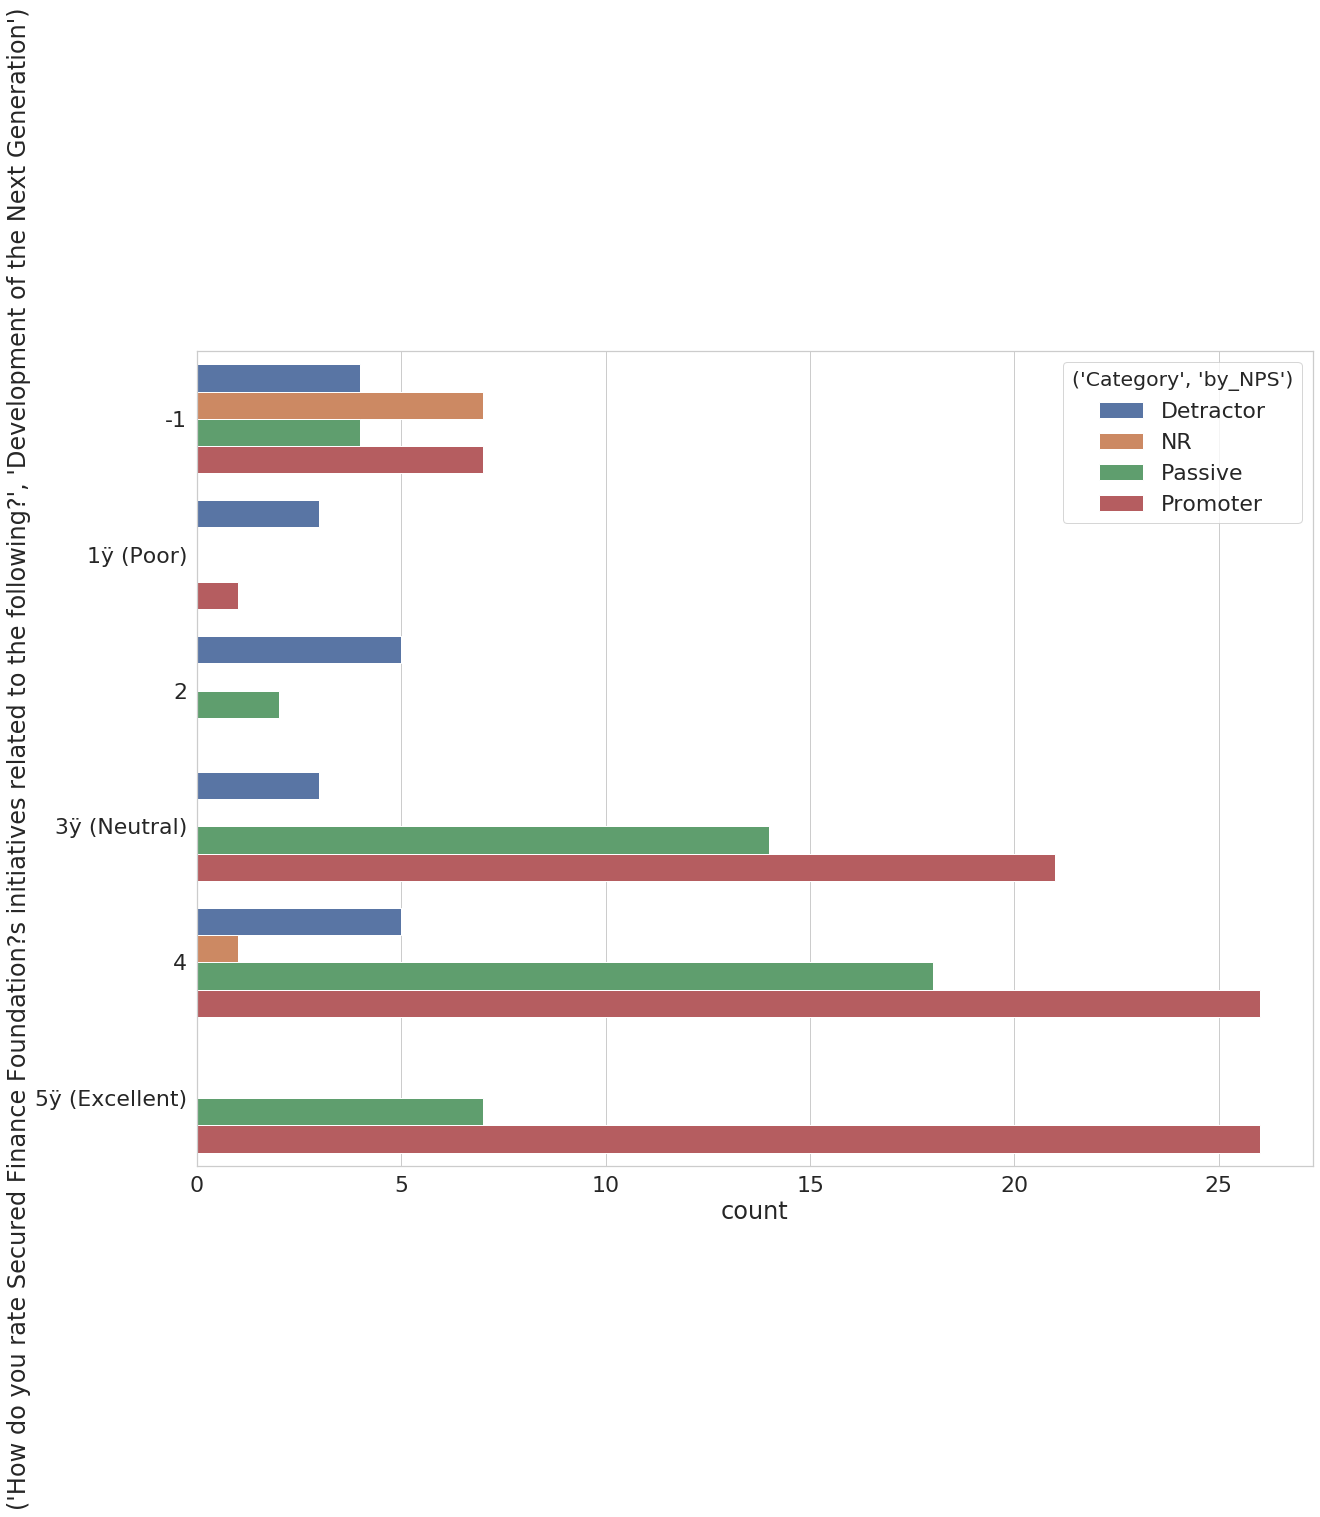

In [34]:
sns.countplot(y=df.iloc[:,6].name, hue=('Category', 'by_NPS'), data=df)

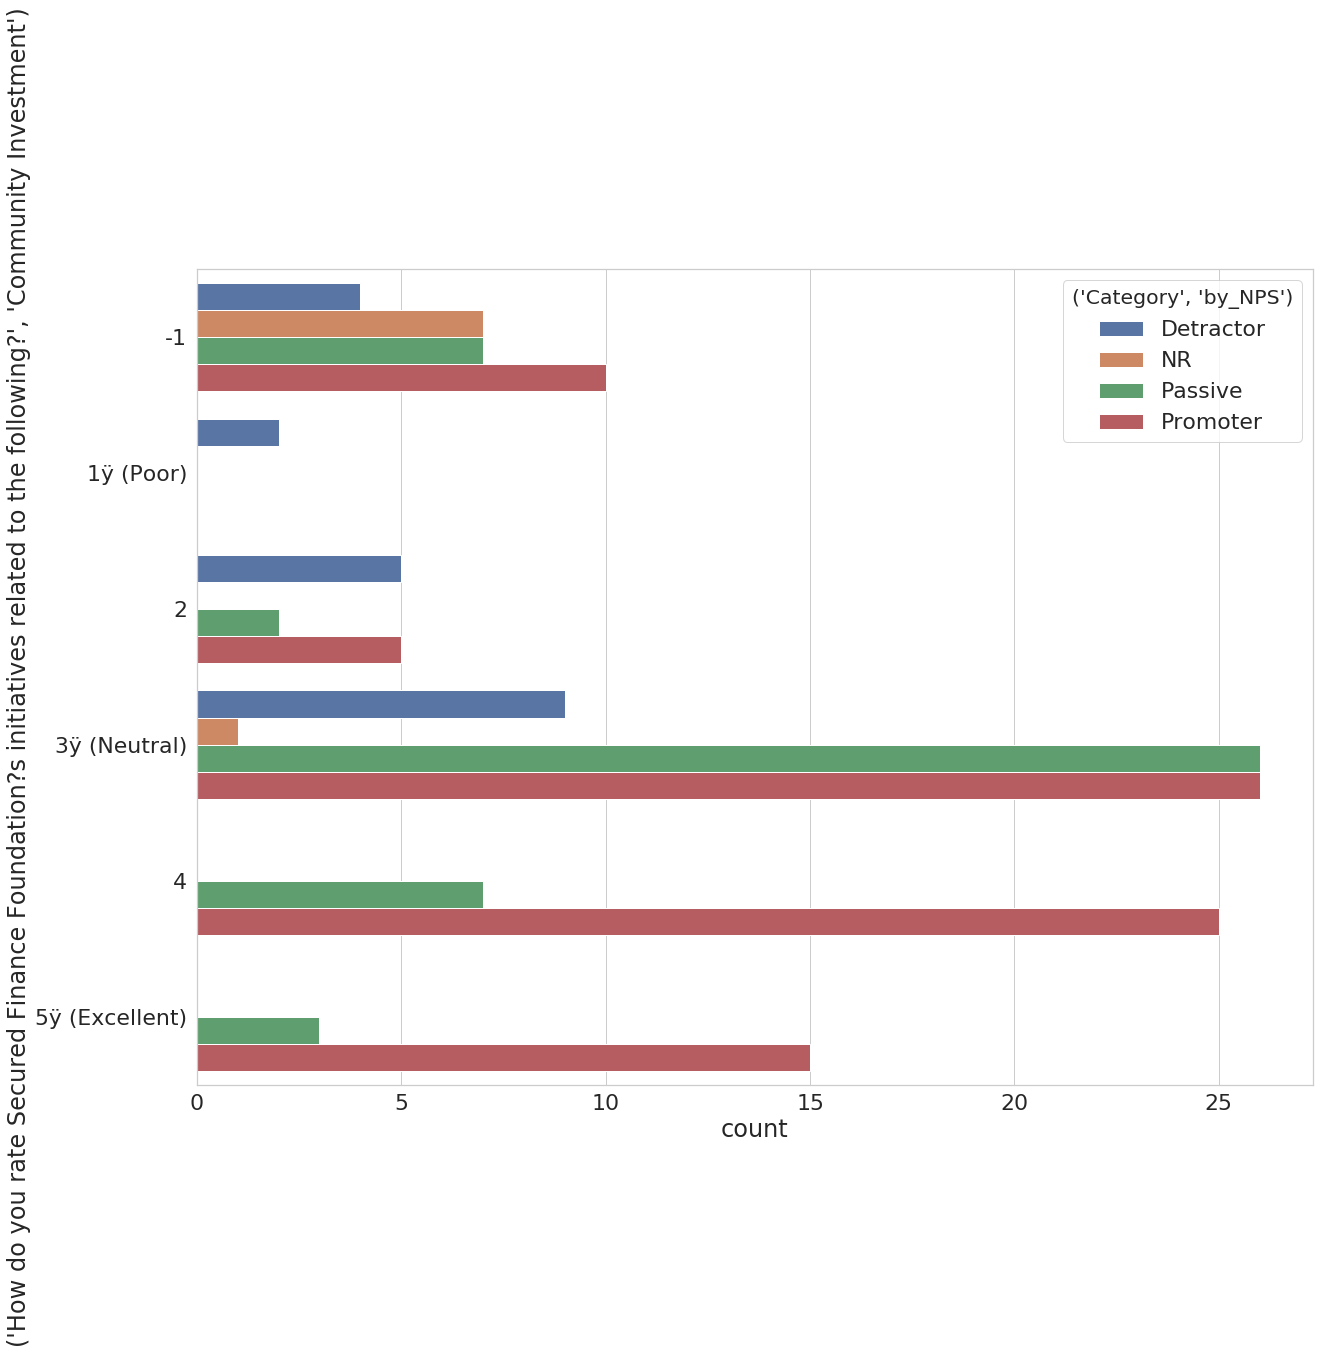

In [35]:
sns.countplot(y=df.iloc[:,7].name, hue=('Category', 'by_NPS'), data=df)

Clear Winner:
'Development of the Next Generation' is most loved by the Promoters. To put it in contrast, people who love this attribute of SFNet, there is a high correlation that they will be Promoters (some additional methods can also be employed to say this deterministically)


Community Investment and Education are trailling features which peak at Rating 3 and 4 respectively, showing that was not a critical feature for the Promoters.


## Question 4: To what other trade associations do you belong?

In [0]:
df.iloc[:,8] = df.iloc[:,8].map(lambda x: x+", ")

In [37]:
x = df[[df.iloc[:,-1].name, df.iloc[:,8].name]].groupby((df.iloc[:,-1].name)).sum().reset_index()
x

,"(Category, by_NPS)",To what other trade associations do you belong? (list all that apply)
0,Detractor,", , TMA, ACG, Hillhouse, East Bay Insiders, AC..."
1,NR,", TMA ACG, , , , , , ,"
2,Passive,"ACG, TMA, ACG, AMAA, TMA, RMA and TMA, ACG, IP..."
3,Promoter,", , TMA, ACG, TMA, ACG, TMA, NCBJ, Turnaround ..."


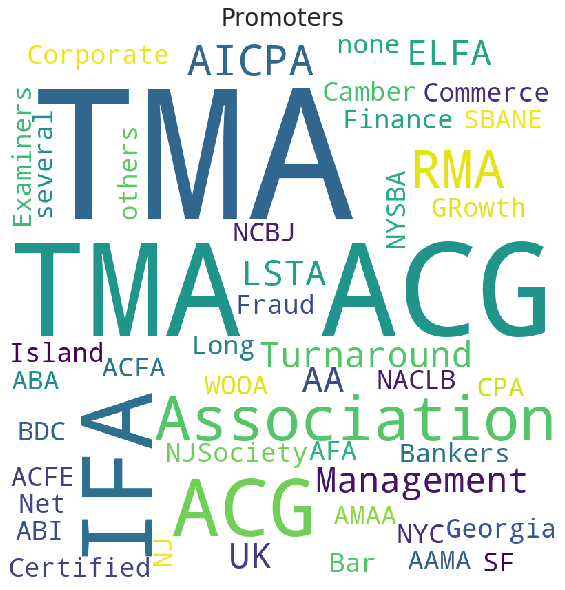

In [38]:
y = x.iloc[3,1]
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', random_state=32).generate(y)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Promoters")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

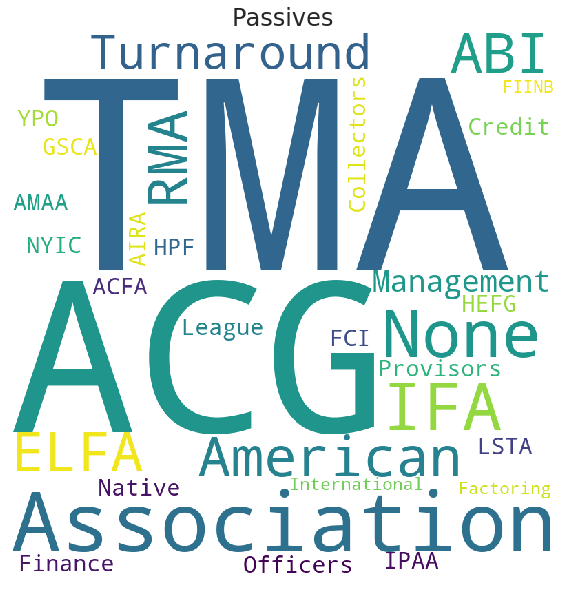

In [39]:
y = x.iloc[2,1]
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', random_state=32).generate(y)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Passives")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

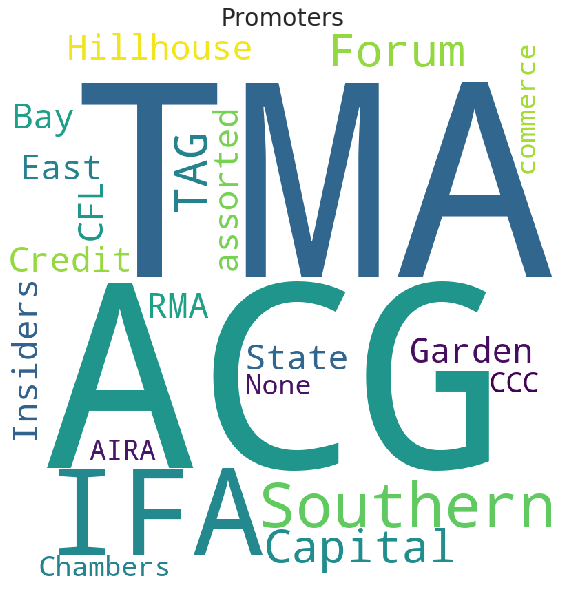

In [40]:
y = x.iloc[0,1]
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', random_state=32).generate(y)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.title("Promoters")
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

The organizations like TMA and ACG highlight in all 3 categories so it not a distinguishing factor for us.

## Question 5: Thinking of the best trade association experiences you have had, how well does SFNet compare on the following dimensions

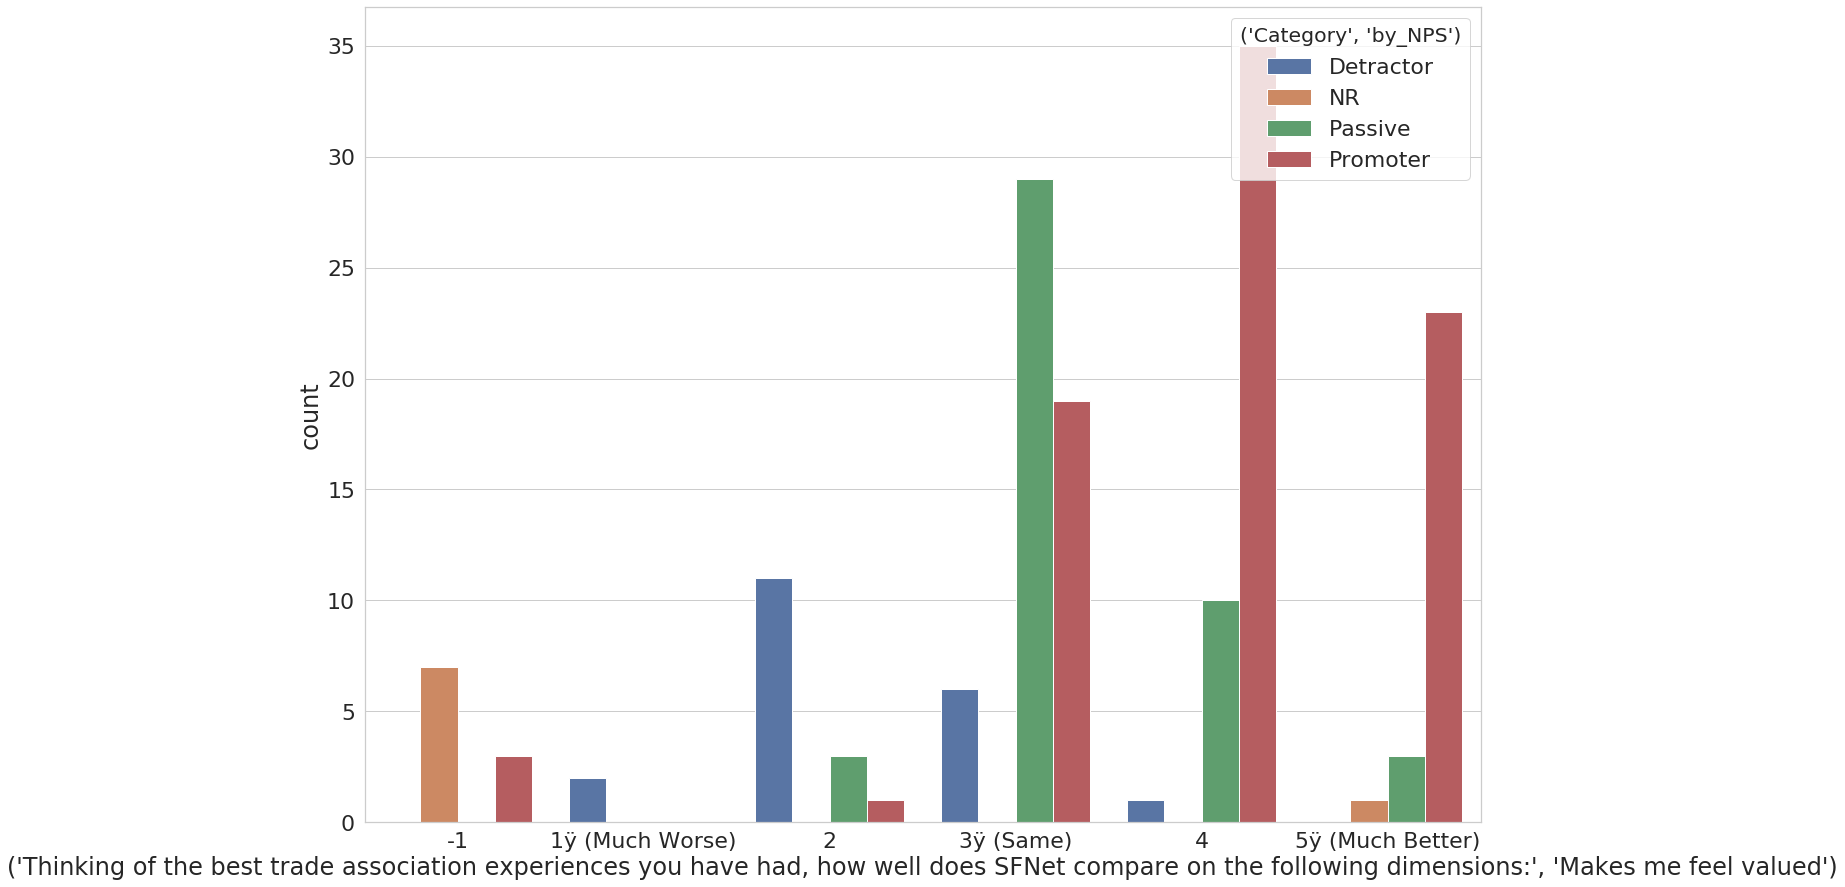

In [41]:
sns.set(rc={'figure.figsize':(20,15)}, font_scale=2, style="whitegrid")
sns.countplot(x=df.iloc[:,9].name, hue=('Category', 'by_NPS'), data=df)

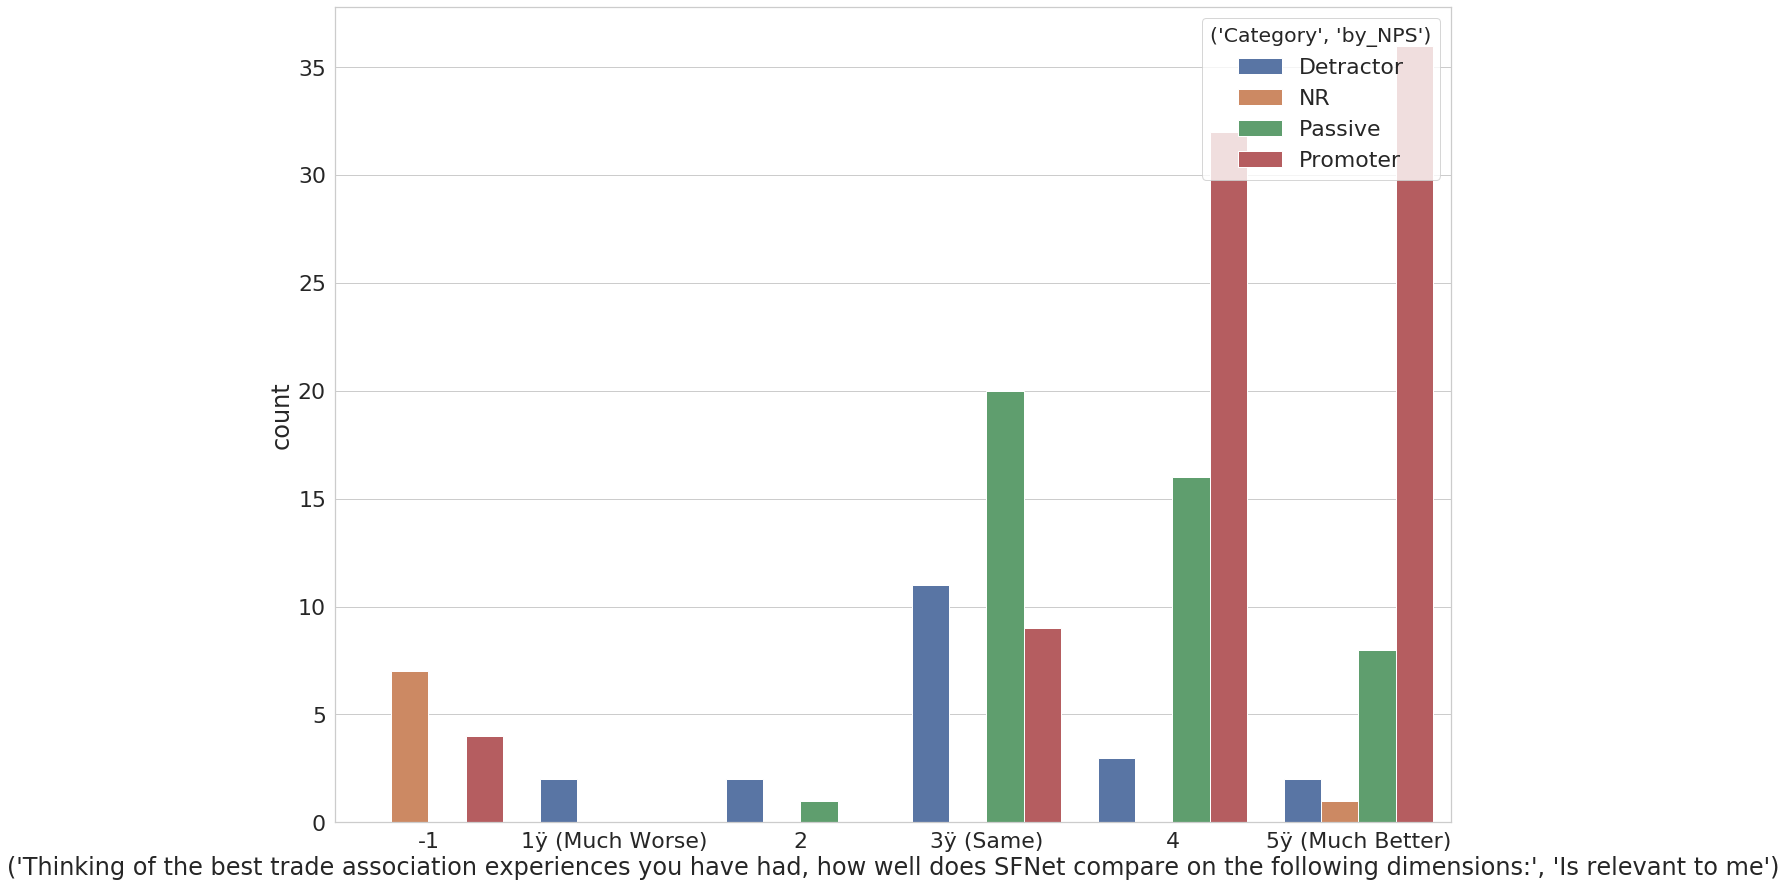

In [42]:
sns.countplot(x=df.iloc[:,10].name, hue=('Category', 'by_NPS'), data=df)

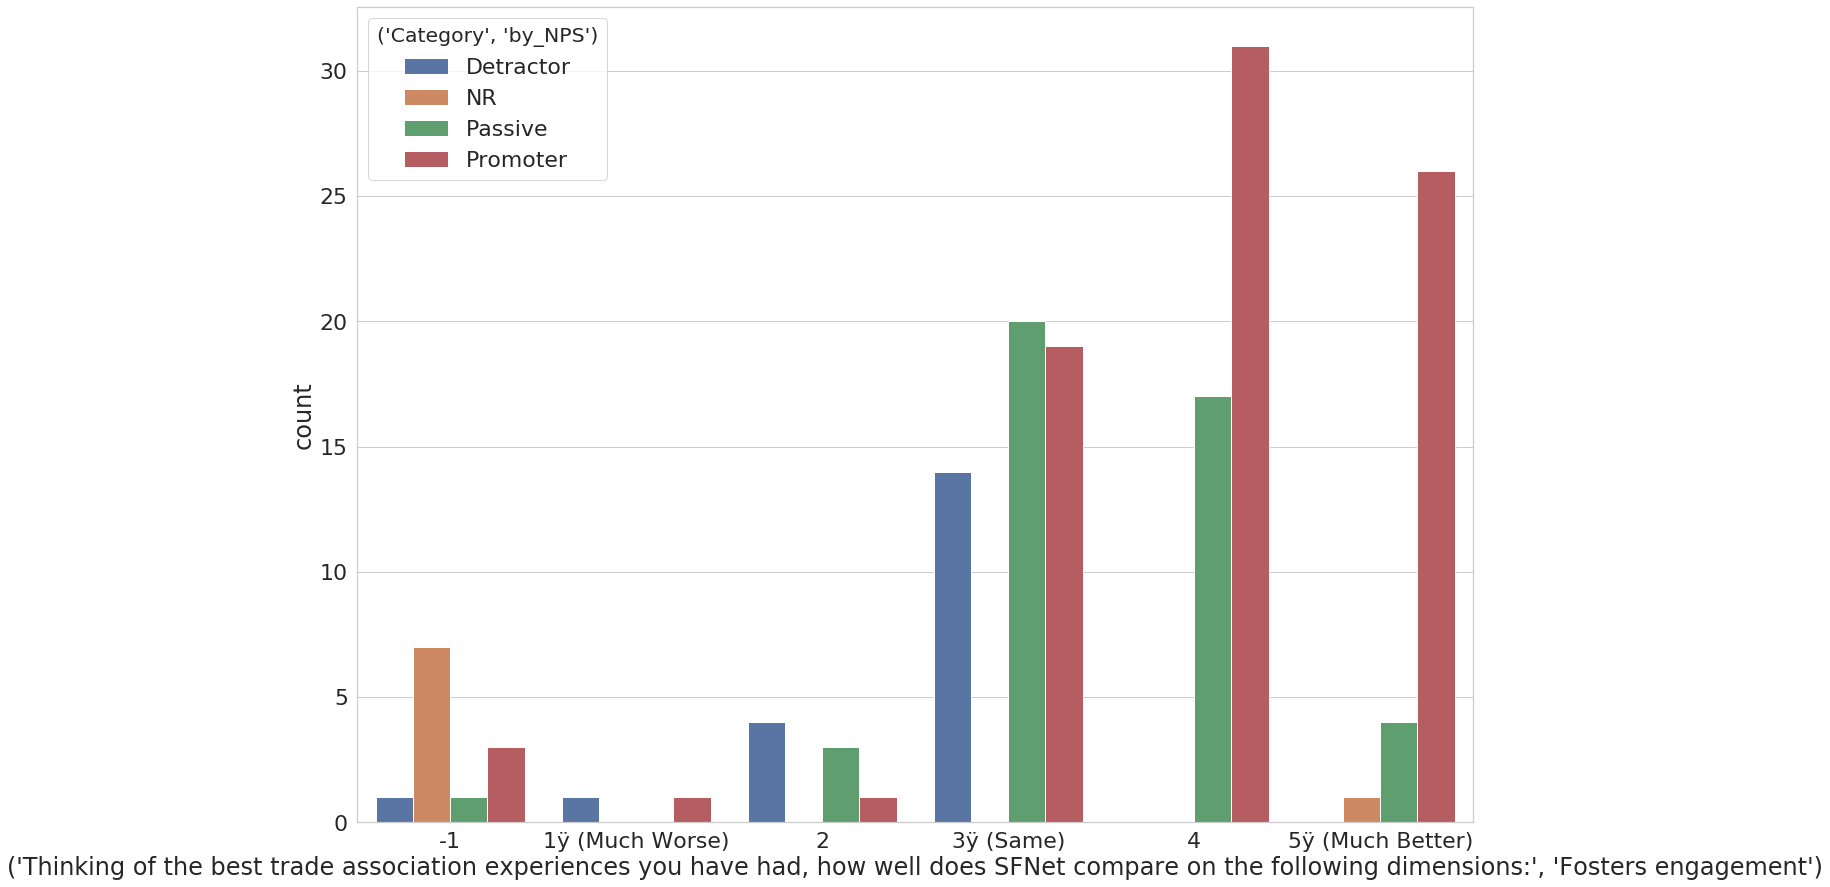

In [43]:
sns.countplot(x=df.iloc[:,11].name, hue=('Category', 'by_NPS'), data=df)

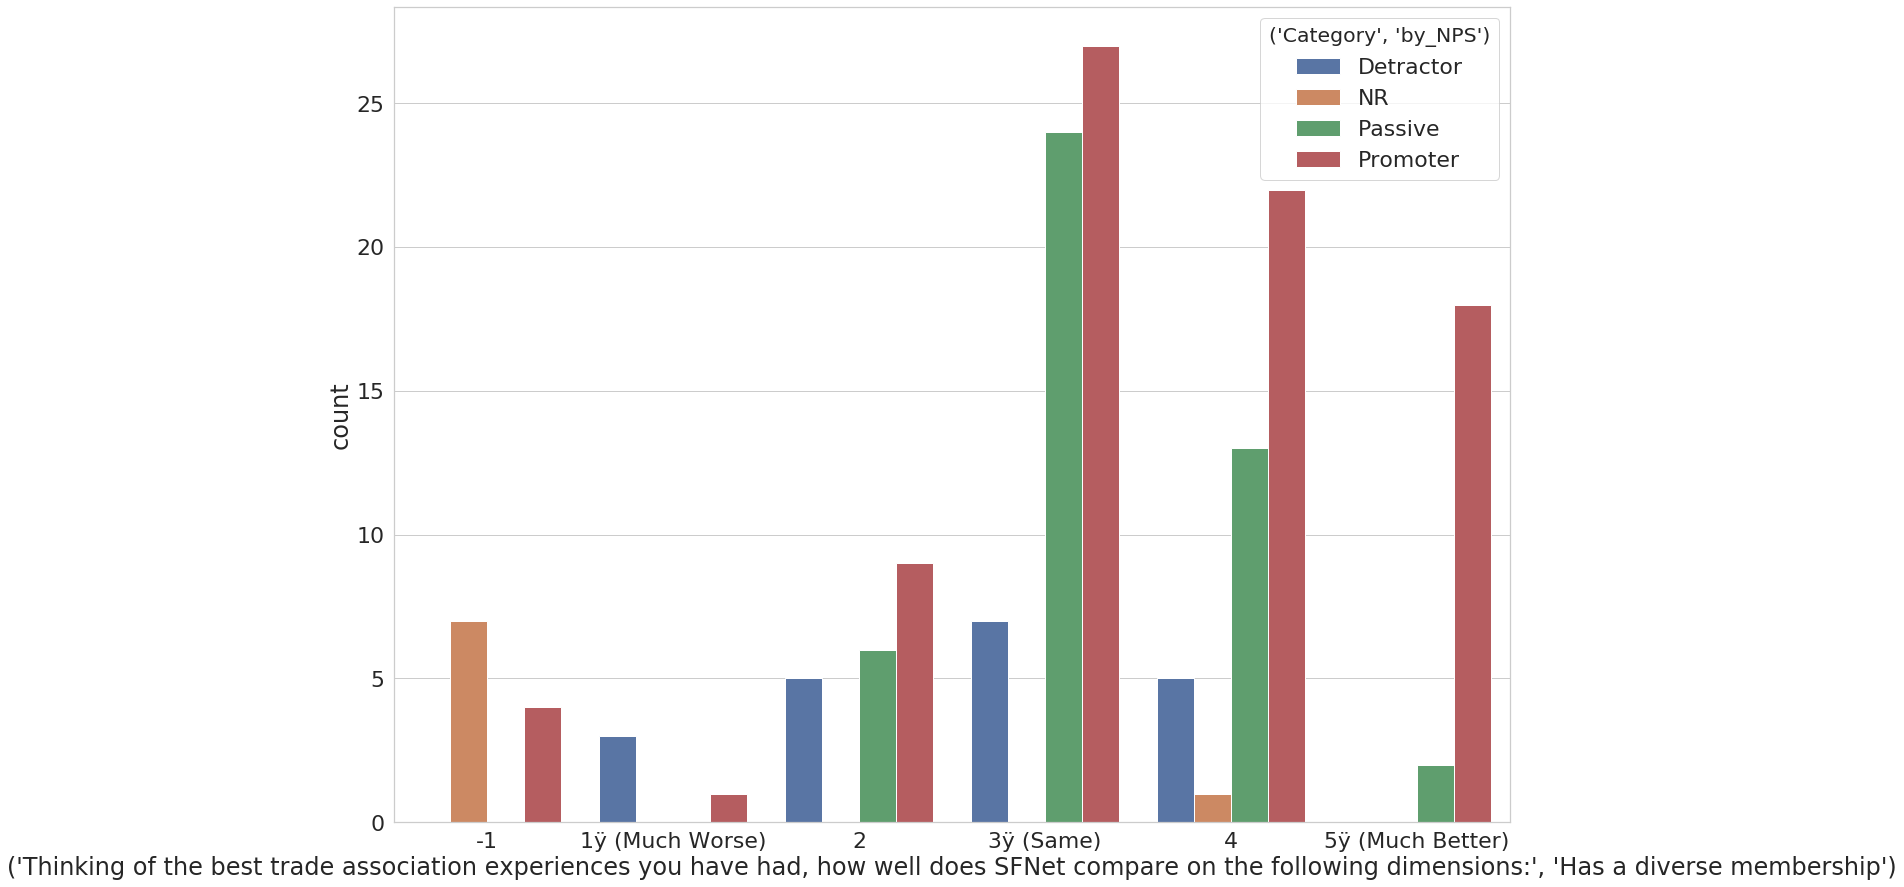

In [44]:
sns.countplot(x=df.iloc[:,12].name, hue=('Category', 'by_NPS'), data=df)

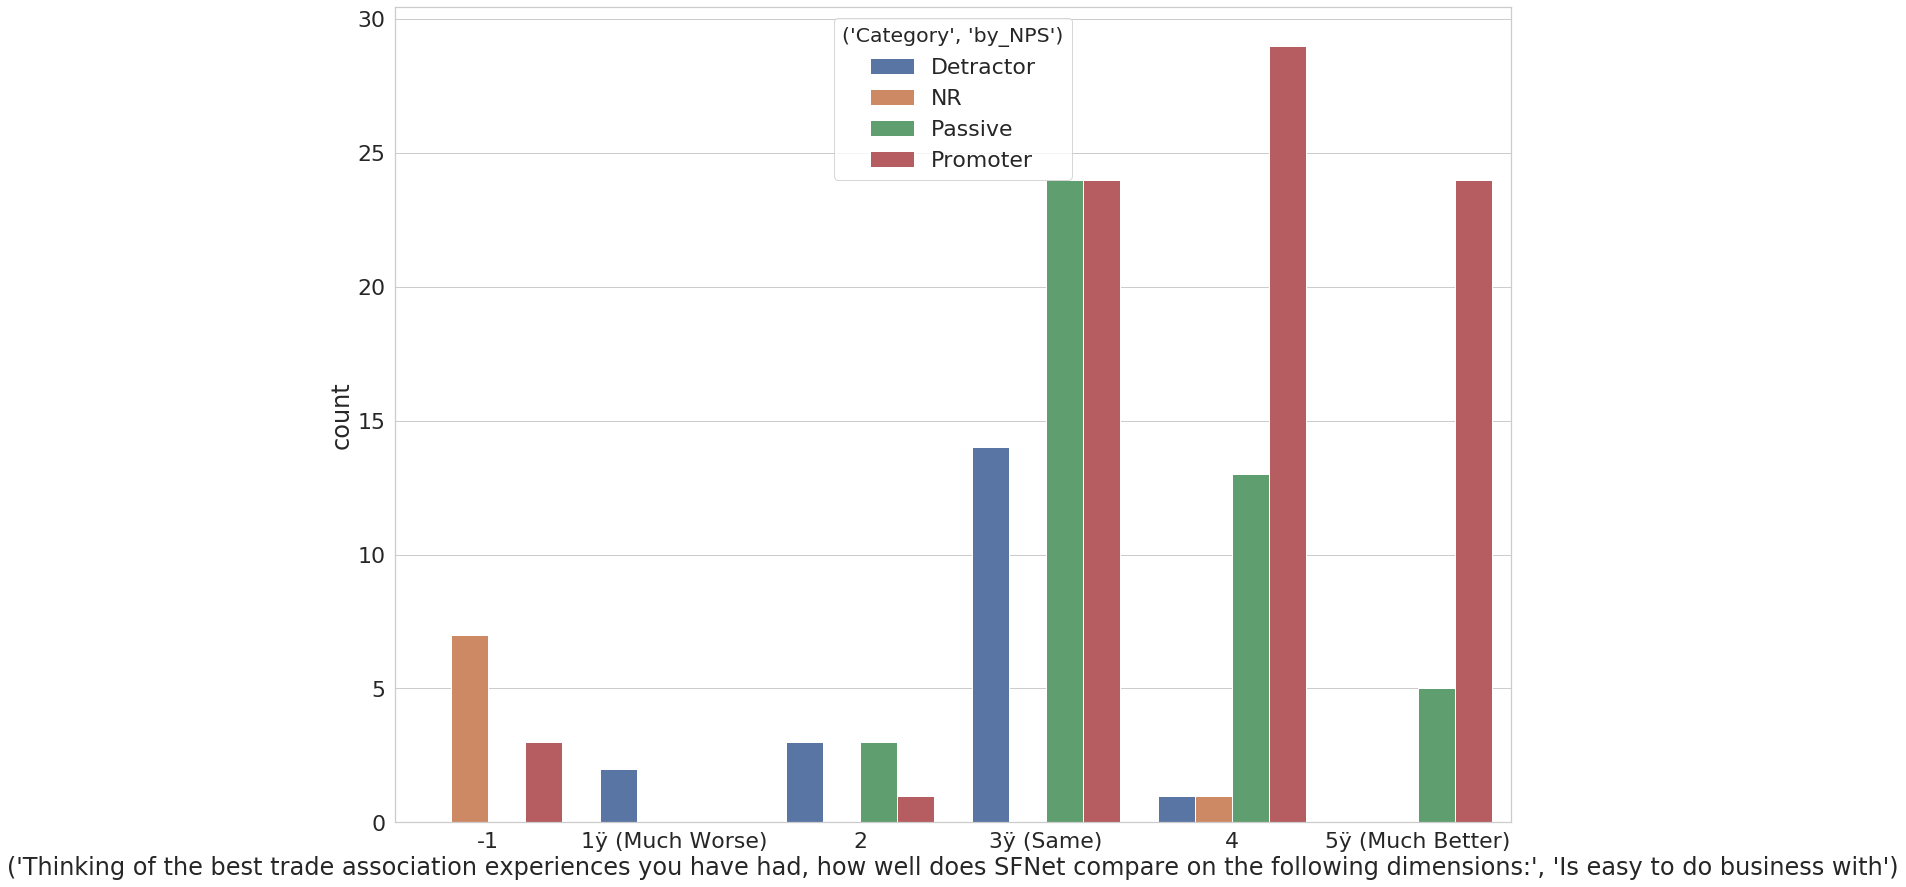

In [45]:
sns.countplot(x=df.iloc[:,13].name, hue=('Category', 'by_NPS'), data=df)

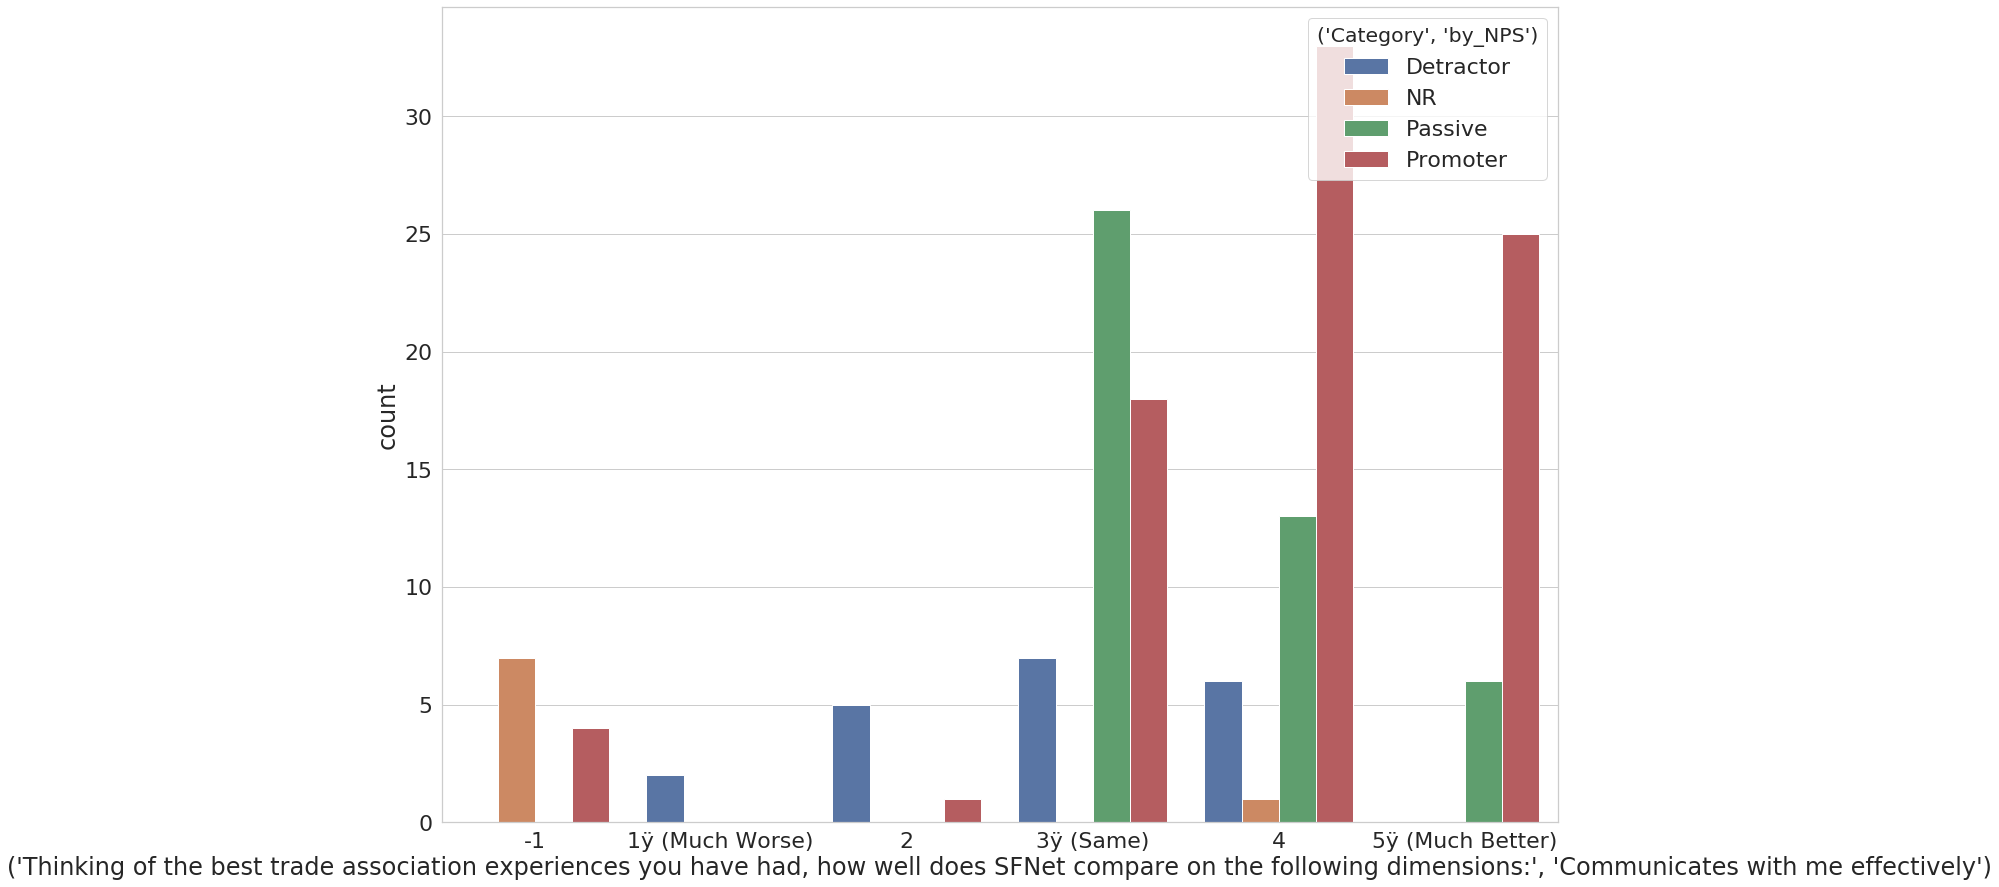

In [46]:
sns.countplot(x=df.iloc[:,14].name, hue=('Category', 'by_NPS'), data=df)

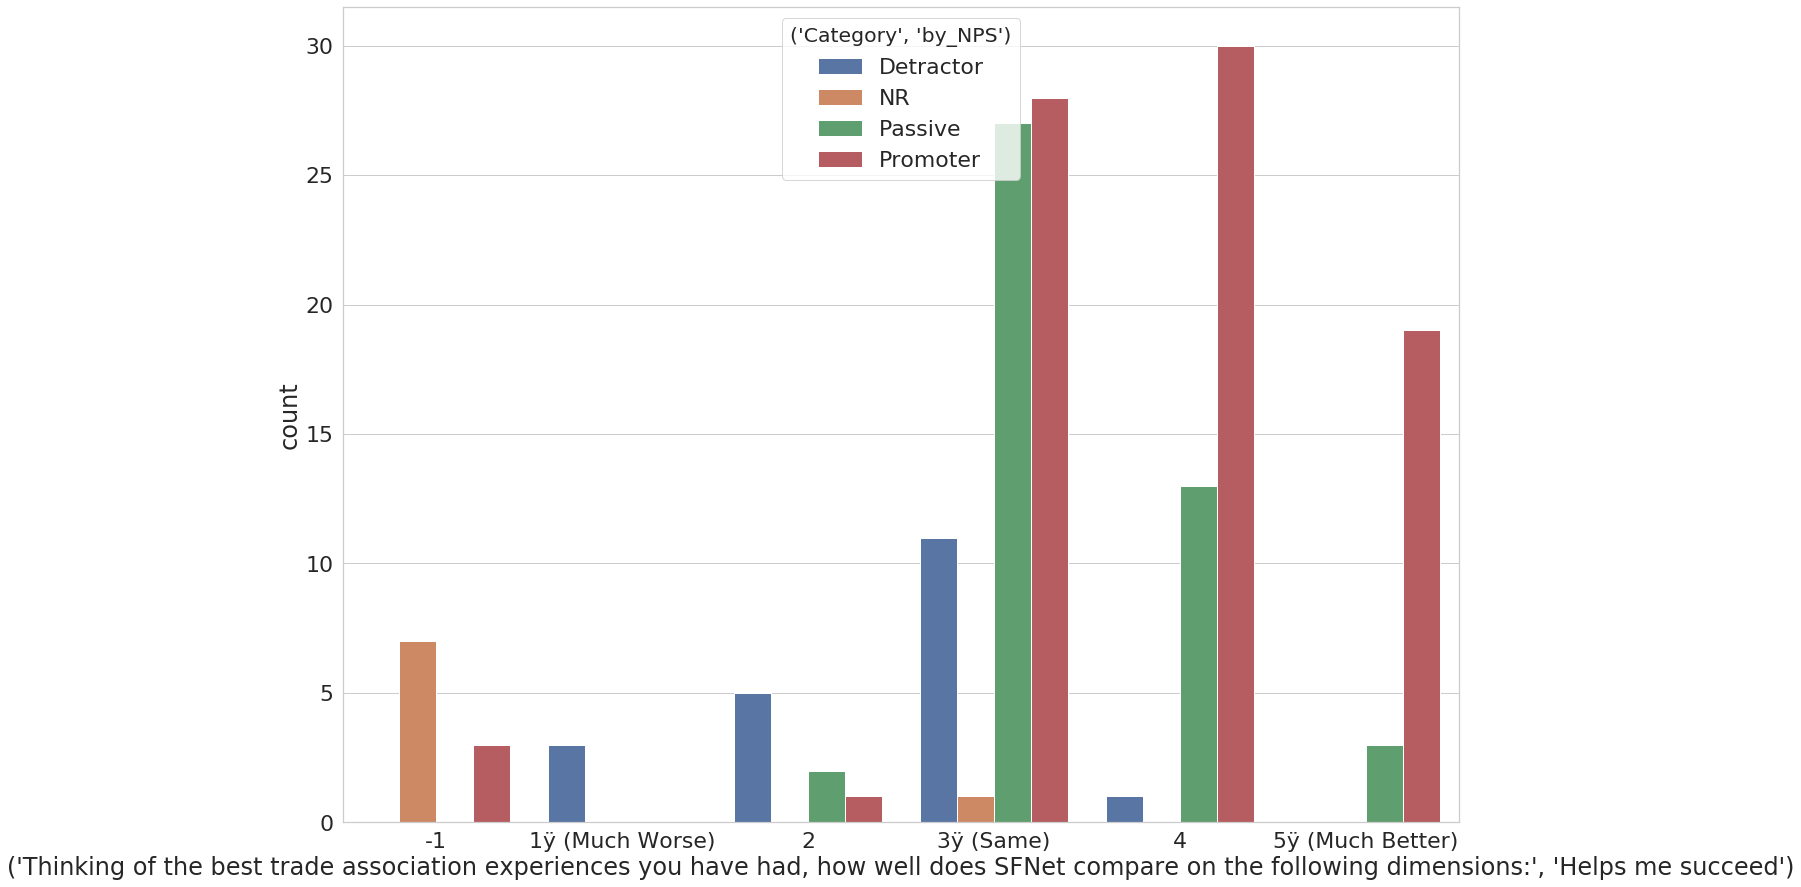

In [47]:
sns.countplot(x=df.iloc[:,15].name, hue=('Category', 'by_NPS'), data=df)

Clear Winner:
The dominating response for Promoters is "it is relevant to me". SFNet can drill deeper into what makes it relevant.

The major response of Passives (and Detractors as well) in all these sections is that they find SFNet same as other trade association experiences. So they do not see a clear value add for SFNet

## Question 6: What constituent groups would you like to see increase within our network (check all that apply):

In [48]:
new= df.iloc[:, 16:26]
new[("Category", "by_NPS")] = category
new.head()

What constituent groups would you like to see increase within our network (check all that apply):  ...  Category
                                                                                Asset-based lenders  ...    by_NPS
0                                                  1                                                 ...  Promoter
1                                                  1                                                 ...  Promoter
2                                                  0                                                 ...  Promoter
3                                                  1                                                 ...  Promoter
4                                                  1                                                 ...  Promoter

[5 rows x 11 columns]

In [49]:
new = new.melt(id_vars=[new.iloc[:,-1].name], var_name=["ques", "group"])
new.head()

,"(Category, by_NPS)",ques,group,value
0,Promoter,What constituent groups would you like to see ...,Asset-based lenders,1
1,Promoter,What constituent groups would you like to see ...,Asset-based lenders,1
2,Promoter,What constituent groups would you like to see ...,Asset-based lenders,0
3,Promoter,What constituent groups would you like to see ...,Asset-based lenders,1
4,Promoter,What constituent groups would you like to see ...,Asset-based lenders,1


In [50]:
new = new.groupby([('Category', 'by_NPS'), "group"])["value"].agg(["sum"]).reset_index()
new.head()

,"(Category, by_NPS)",group,sum
0,Detractor,Asset-backed securitization firms,5
1,Detractor,Asset-based lenders,11
2,Detractor,Cash flow/mezzanine lenders/BDC?s,9
3,Detractor,Equipment finance and leasing companies,4
4,Detractor,Factors,4


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 3600x3600 with 0 Axes>

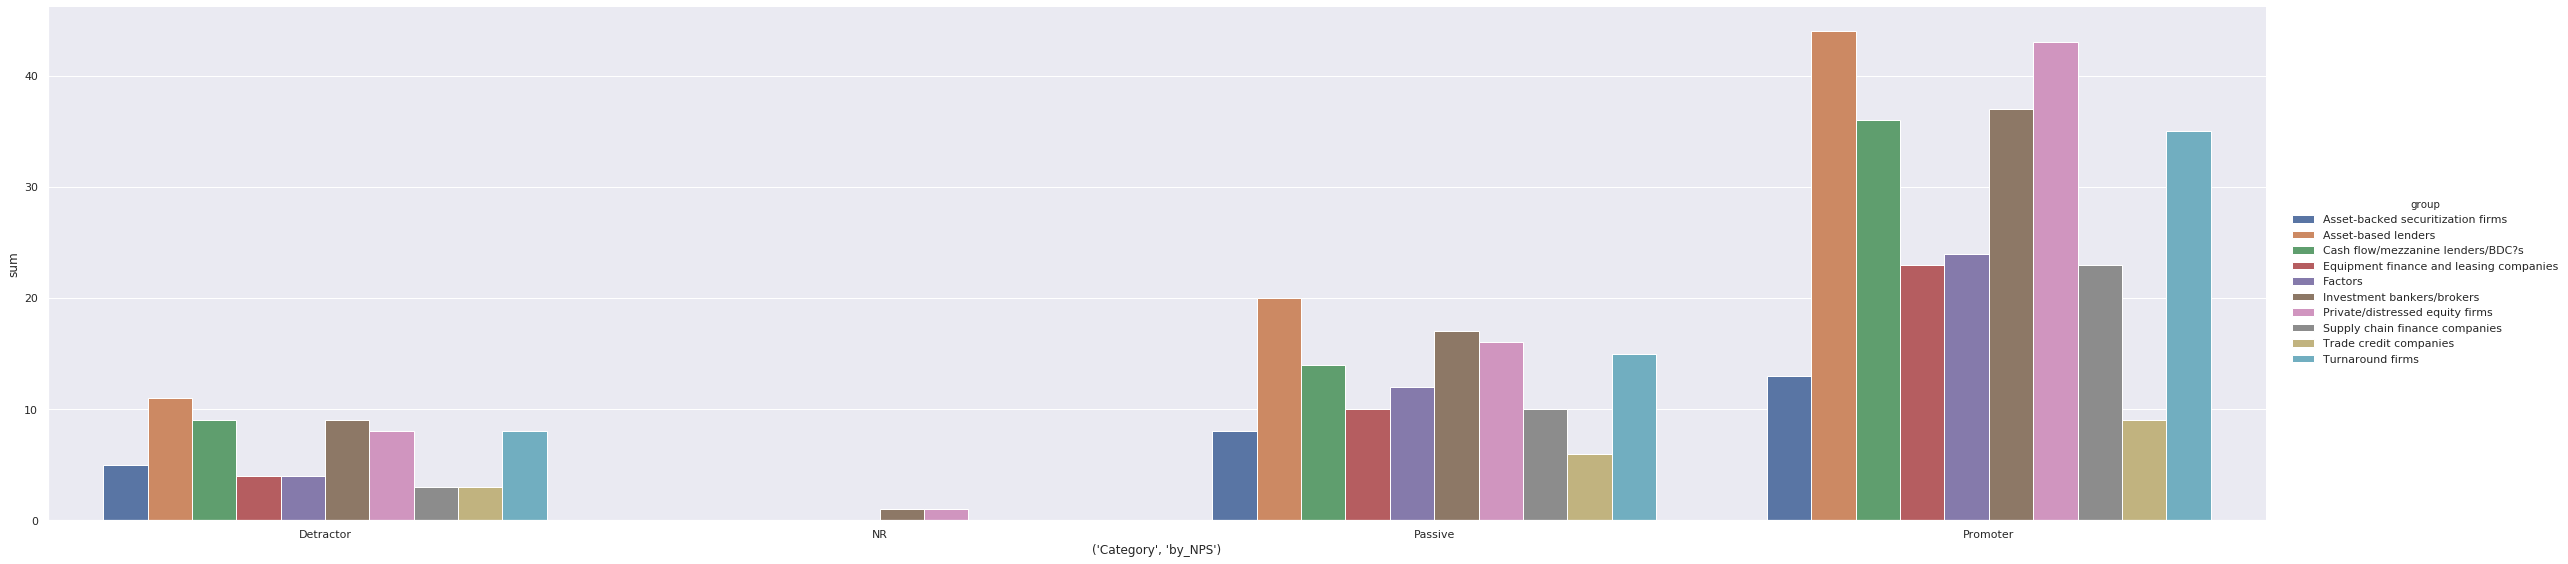

In [51]:
plt.figure(figsize = (50, 50), facecolor = None)
sns.set(rc={'figure.figsize':(50,50)})
sns.catplot(data=new, hue= 'group', y="sum", kind="bar", x=('Category', 'by_NPS'), size=8, aspect=4)

We see a similar trend in all the classes (Promoters, Passives etc.) with Asset based lenders taking peaks followed by Private Equity firms, Turaround firms, Investment bankers etc.) 

So all of the classes feel the need to add the certain above groups.

## Question 7: Where would you like to see SFNet invest its efforts in 2020?

In [52]:
new= df.iloc[:, 27:35]
new[("Category", "by_NPS")] = category
new = new.melt(id_vars=[new.iloc[:,-1].name], var_name=["ques", "group"])
new = new.groupby([('Category', 'by_NPS'), "group"])["value"].agg(["sum"]).reset_index()
new.head()

,"(Category, by_NPS)",group,sum
0,Detractor,Attracting new members,5
1,Detractor,Creating new national events,4
2,Detractor,Expanding advocacy,4
3,Detractor,Fostering diversity and inclusion,2
4,Detractor,Improving educational offerings,3


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


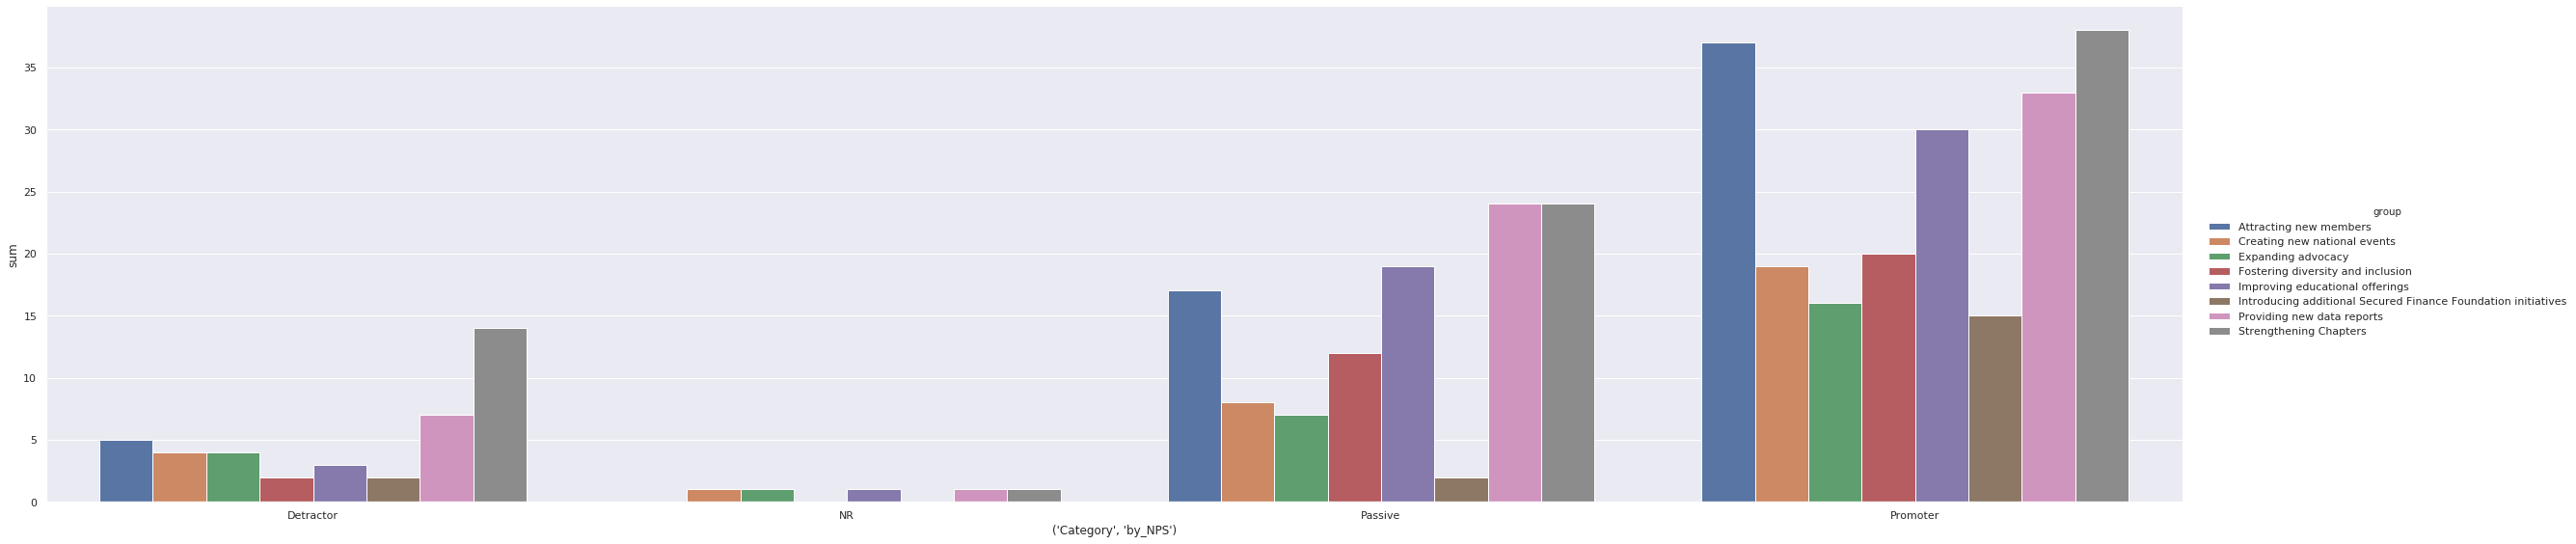

In [53]:
sns.catplot(data=new, hue= 'group', y="sum", kind="bar", x=('Category', 'by_NPS'), size=8, aspect=4)

Attracting Members, strengthening chapters were a clear priority for the Promoters, following up with New data reports

Other classes had different opinions on 'Attracting members' as a priority.

In conlusion, weighting more on Promoters' opinions, but considering the whole picture, the top 3 priorities should be:
1. Strengthening Chanpters
2. Attracting Members
3. New Data Reports

## Question 8: What can SFNet do better to increase the value of your membership?

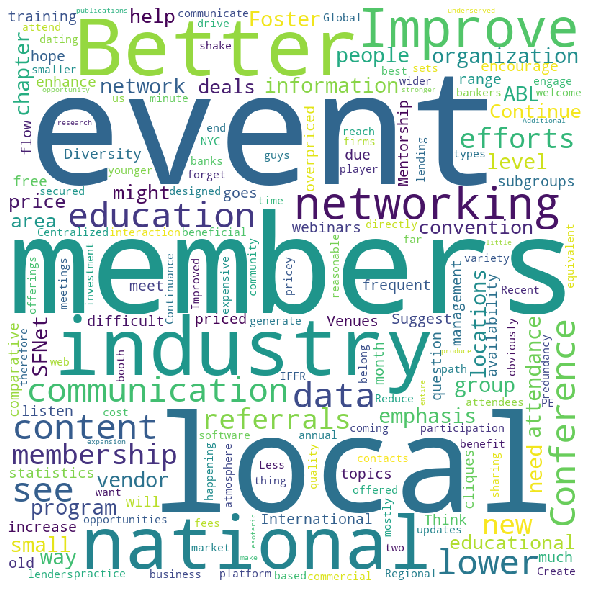

In [54]:
y = " ".join(list(df.iloc[:,36]))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', random_state=32).generate(y)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

No set pattern seem to emerge here with events, networking, communication as highlighted words

## Question 9: How frequently do you interact with SFNet?

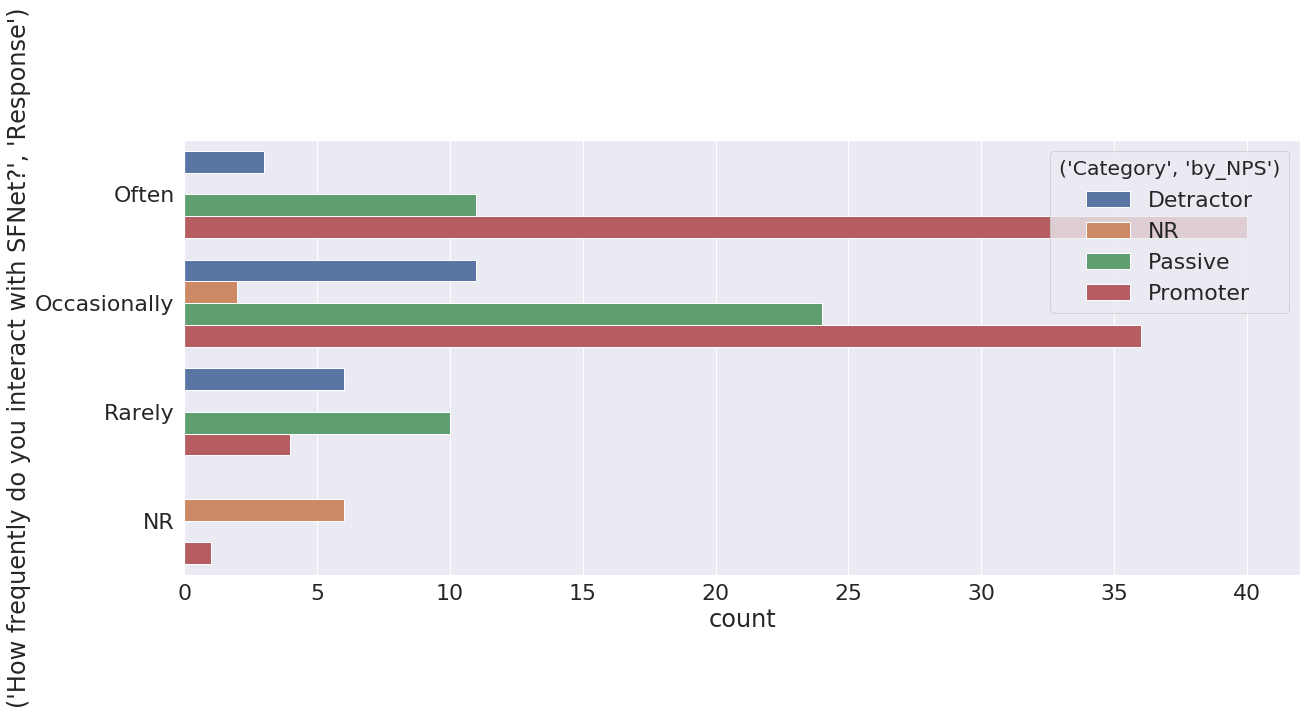

In [55]:
sns.set(rc={'figure.figsize':(20,8)}, font_scale=2)
sns.countplot(y=df.iloc[:,37].name, hue=('Category', 'by_NPS'), data=df, order=["Often", "Occasionally", "Rarely", "NR"])

This tred is understandable as most interaction will be done by Promoters then Passives and then Detractors.

## Question 10: What are the top three challenges facing your organization this year?

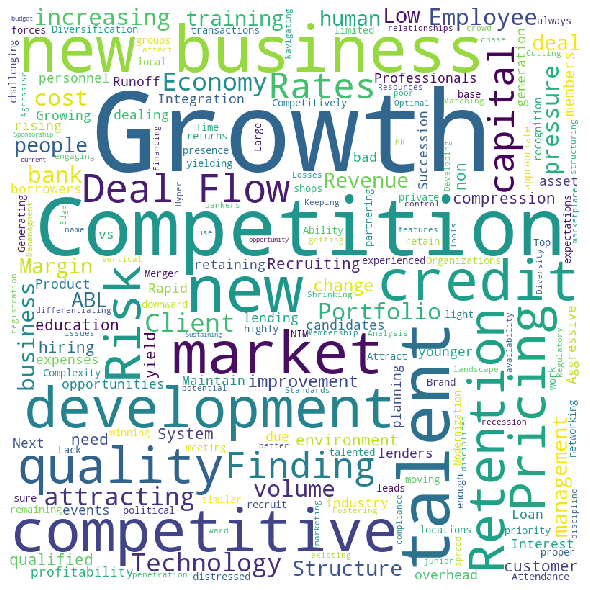

In [56]:
y = " ".join(list(df.iloc[:,38])+list(df.iloc[:,39])+list(df.iloc[:,40]))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', random_state=32).generate(y)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Clear top 3 challenges can be identified by our wordcloud with the major ones:
- Growth, deal flow, staying competitive, new business/ markets
- Talent/ Employee matters

## Question 11: Are you a member of:

In [57]:
new= df.iloc[:, 41:44]
new[("Category", "by_NPS")] = category
new = new.melt(id_vars=[new.iloc[:,-1].name], var_name=["ques", "group"])
new = new.groupby([('Category', 'by_NPS'), "group"])["value"].agg(["sum"]).reset_index()
new.head()

,"(Category, by_NPS)",group,sum
0,Detractor,Both,7
1,Detractor,Chapter (U.S. or international),6
2,Detractor,National,7
3,NR,Both,2
4,NR,Chapter (U.S. or international),0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


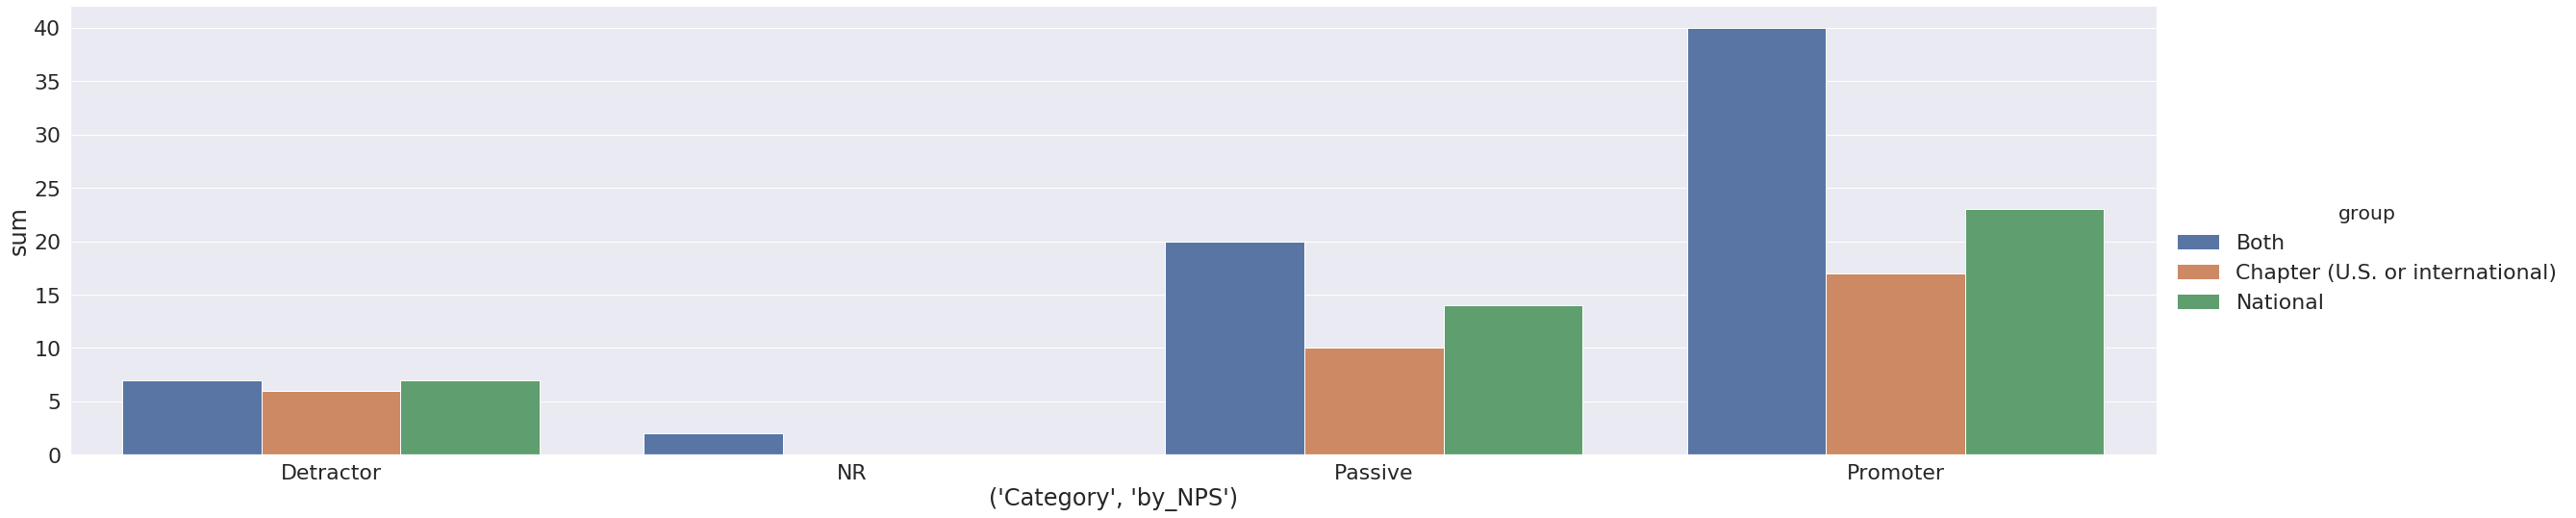

In [58]:
sns.catplot(data=new, hue= 'group', y="sum", kind="bar", x=('Category', 'by_NPS'), size=8, aspect=4)

The trend in all the categories is similar so National or International chapter is not making the actual dent.

## Question 12:  What type of organization do you work for?

In [59]:
df.iloc[:,44]

0                                        Law firm
1                                 Independent ABL
2          Small to mid-sized bank-affiliated ABL
3                                        Law firm
4      Service provider or other (please specify)
                          ...                    
149                                          <NR>
150                                          <NR>
151                                          <NR>
152                                          <NR>
153                                          <NR>
Name: (What type of organization do you work for?, Response), Length: 154, dtype: category
Categories (8, object): [<NR>, Bank-affiliated factoring firm, Independent ABL,
                         Independent factoring firm, Large bank-affiliated ABL, Law firm,
                         Service provider or other (please specify), Small to mid-sized bank-affiliated ABL]

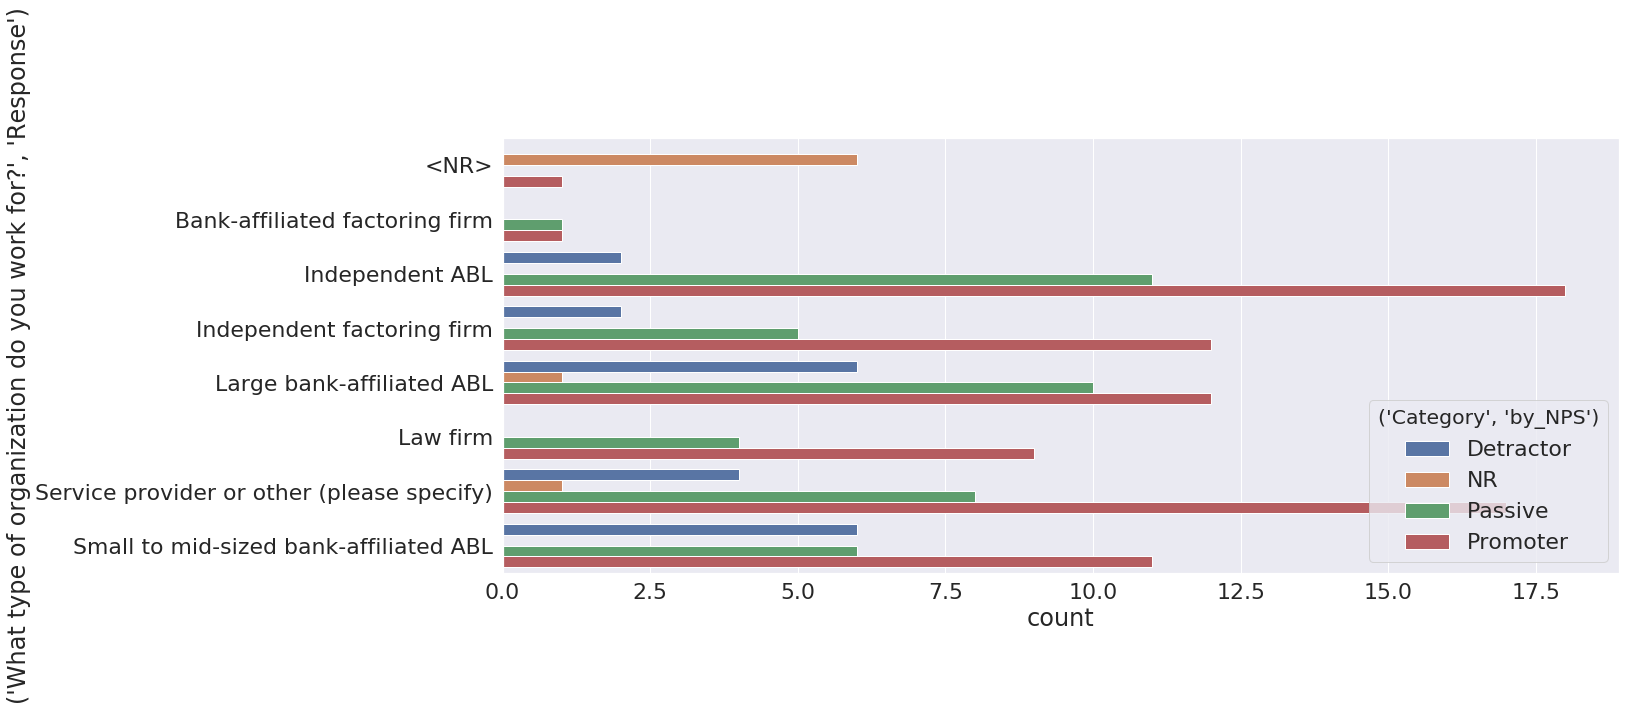

In [60]:
sns.set(rc={'figure.figsize':(20,8)}, font_scale=2)
sns.countplot(y=df.iloc[:,44].name, hue=('Category', 'by_NPS'), data=df)

Independent ABL and other service providers are listed as major groups. But the distinction of demographics in the classes in not evident as all classes take peaks at the same time. So targeting people based on organization will not be that effective. 
Although 'Service provider or other' group is one that peaks for Promoters but not for others. So lets dig deeper. 

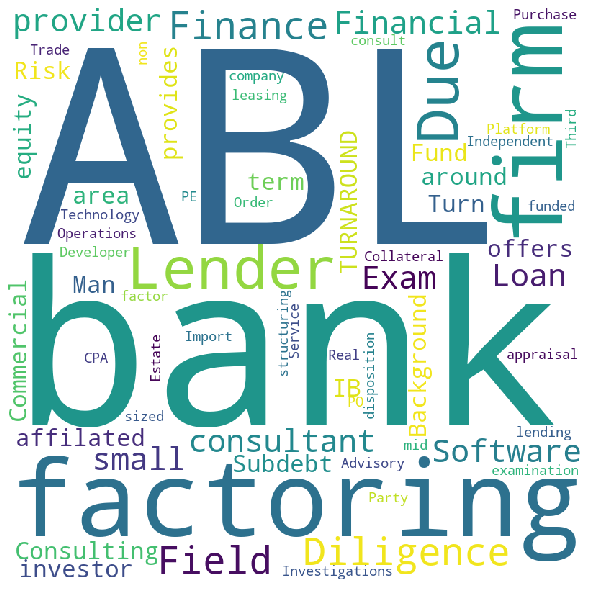

In [61]:
y = " ".join(list(df.iloc[:,45]))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', random_state=32).generate(y)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Some of these options fall into the previous categories as well. Rest falls in the Service providers.

## Question 13:  What is your role in your organization?

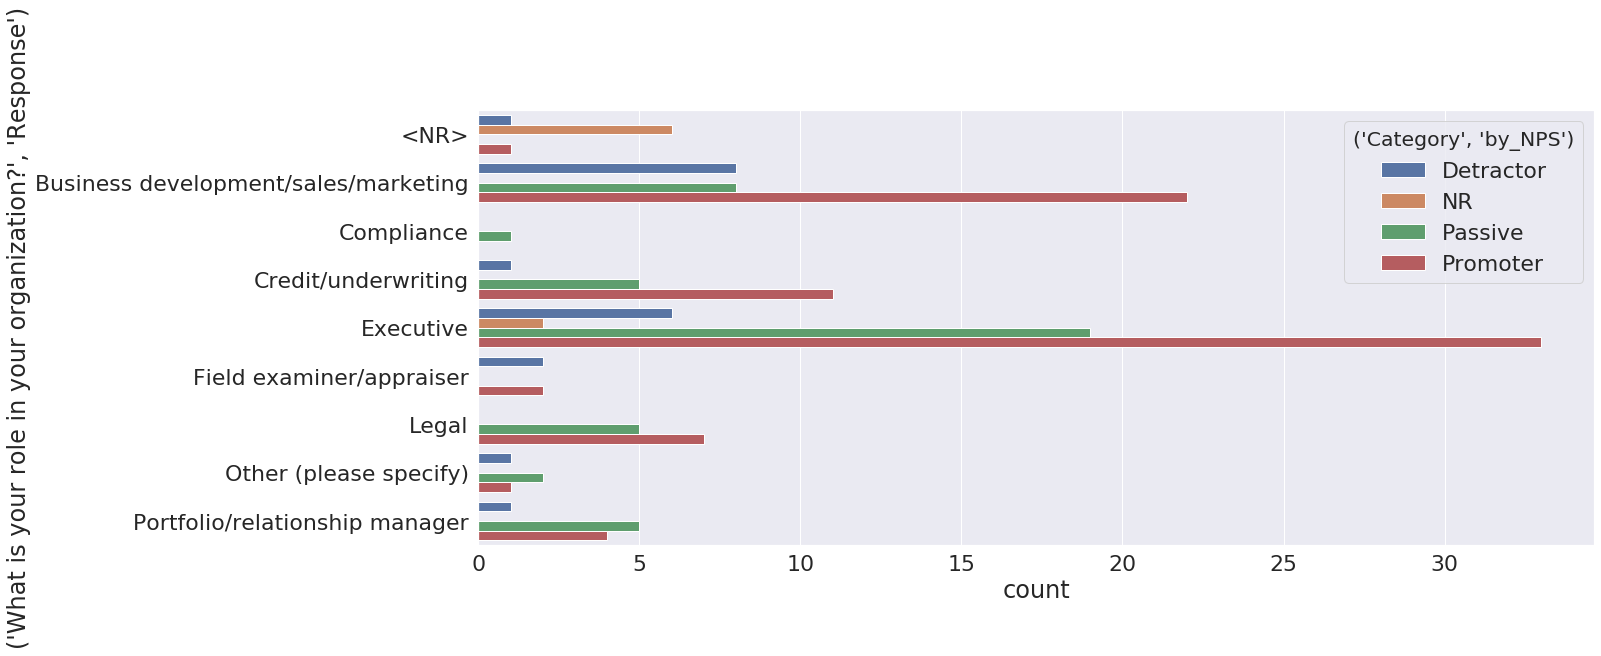

In [62]:
sns.set(rc={'figure.figsize':(20,8)}, font_scale=2)
sns.countplot(y=df.iloc[:,46].name, hue=('Category', 'by_NPS'), data=df)

Executive and Business/sales/marketing are the right audience demographics for SFNet as shown by the above plot.

## Question 14: How many years have you been in the secured finance industry?

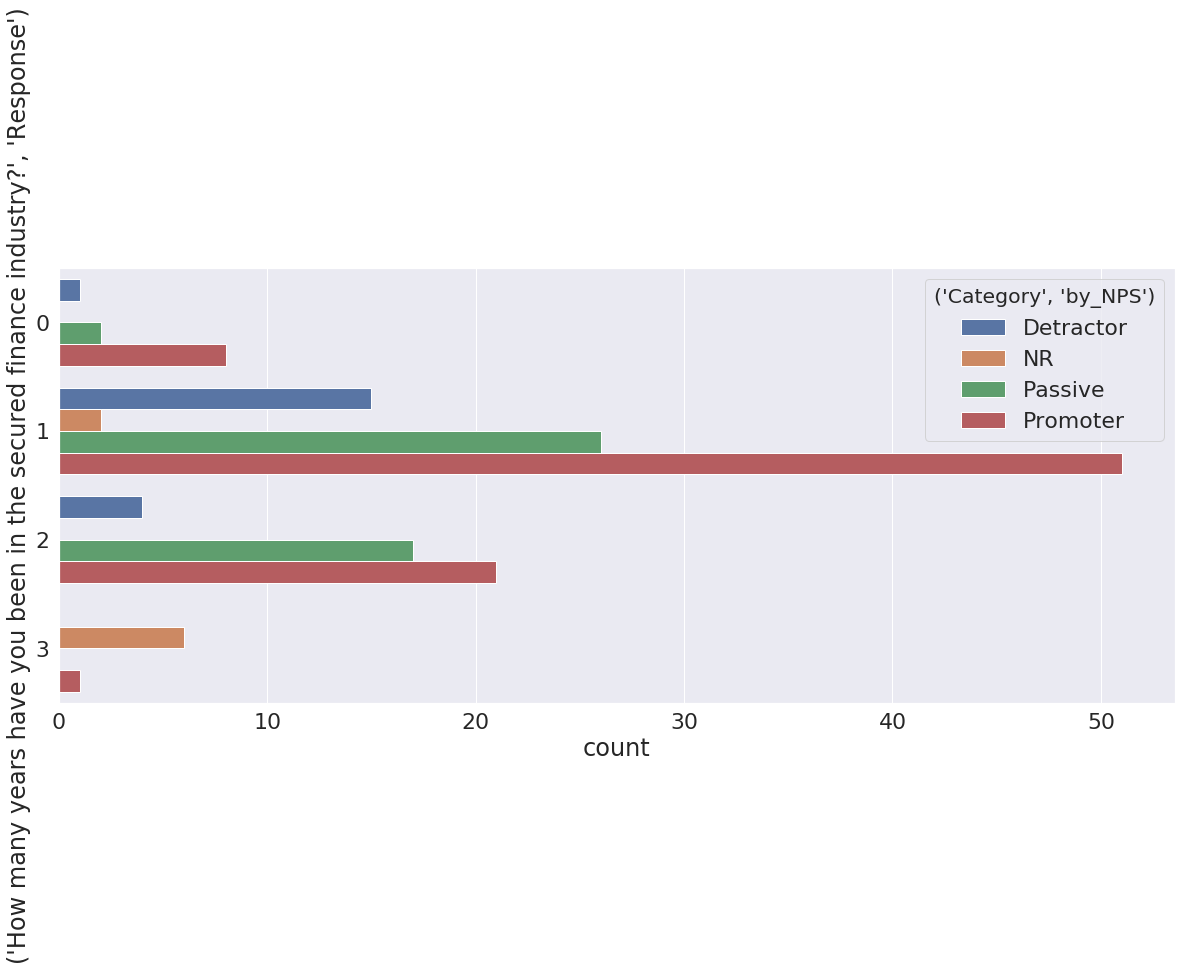

In [63]:
sns.countplot(y=df.iloc[:,48].name, hue=('Category', 'by_NPS'), data=df)

In [64]:
le1.inverse_transform([0,1,2,3])

array(['1 to 5', '20+', '6 to 19', 'nan'], dtype='<U7')

The age group is not a distinguishing factor.

## Question 15: What is your gender?

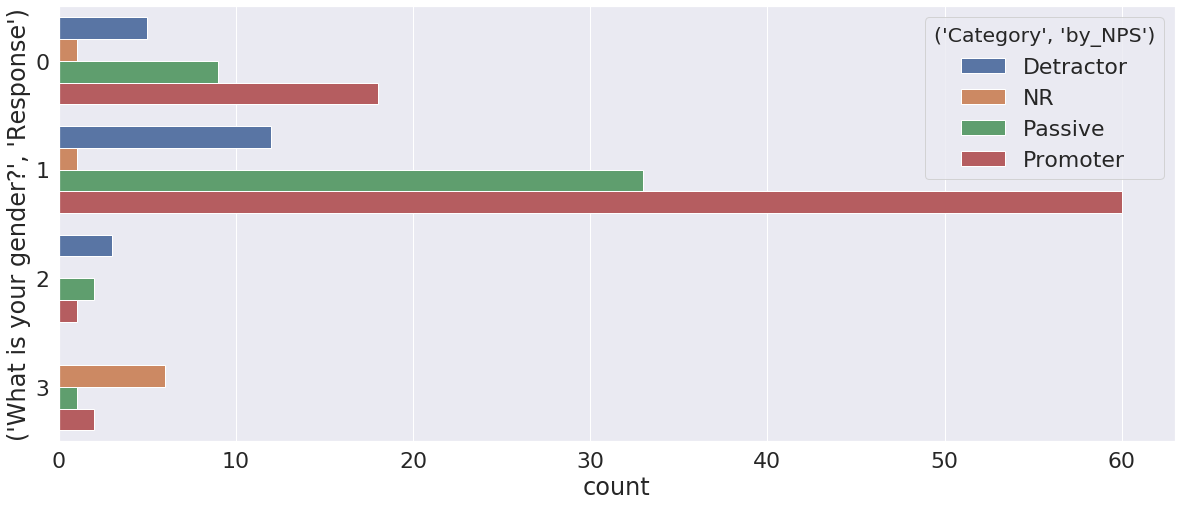

In [65]:
sns.countplot(y=df.iloc[:,49].name, hue=('Category', 'by_NPS'), data=df)

In [66]:
le.inverse_transform([0,1,2,3])

array(['Female', 'Male', 'Prefer not to specify', 'nan'], dtype='<U21')

Most of the audience attempting the survey are Male.